<a href="https://colab.research.google.com/github/huricane85/FPL-API-Fixture-modeler/blob/main/FPL_Model_13_02_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/doughagey/UnderstatScraper

Cloning into 'UnderstatScraper'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 34 (delta 11), reused 25 (delta 2), pack-reused 0
Receiving objects: 100% (34/34), 268.30 KiB | 2.08 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mar 1 17:50:36 2020
@author: doug hagey
"""

import pandas as pd
import requests

def scrape_understat(payload):
    #Build request using url, headers (mimicking what Firefox does normally)
    #Works best with verify=True as you won't get the ssl errors. Payload is
    #taylored for each request
    url = 'https://understat.com/main/getPlayersStats/'
    headers = {'content-type':'application/json; charset=utf-8',
    'Host': 'understat.com',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73.0) Gecko/20100101 Firefox/73.0',
    'Accept': 'application/json, text/javascript, */*; q=0.01',
    'Accept-Encoding': 'gzip, deflate, br',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'X-Requested-With': 'XMLHttpRequest',
    'Content-Length': '310',
    'Origin': 'https: // understat.com',
    'Connection': 'keep - alive',
    'Referer': 'https: // understat.com / league / EPL'
    }
    response = requests.post(url, data=payload, headers = headers, verify=True)
    response_json = response.json()
    inner_wrapper = response_json['response']
    json_player_data = inner_wrapper['players']
    return json_player_data

def clean_df(player_df, weeks):
    # Get rid of the columns that we don't care about
    #player_df.drop(['yellow_cards','red_cards', 'xGChain','xGBuildup','games','time'], axis=1, inplace=True)
    player_df  = player_df.rename(columns={'goals':'goals_'+weeks,'xG':'xG_'+weeks,'assists':'assists_'+weeks, 'xA':'xA_'+weeks, 'shots':'shots_'+weeks, 'key_passes':
        'key_passes_'+weeks,'npg':'npg_'+weeks,'npxG':'npxG_'+weeks})
    if weeks != '1wks':
        player_df.drop(['position','team_title'], axis=1, inplace=True)
    return(player_df)

#Creprint('Getting data for last 1 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '24'})
one_game_table = pd.DataFrame(json_player_data)
one_game_df = clean_df(one_game_table,'6wks')


print('Getting data for the whole season')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023'})
season_table = pd.DataFrame(json_player_data)
season_df = clean_df(season_table, 'season')

print('Getting data for last 1 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '24'})
one_game_table = pd.DataFrame(json_player_data)
one_game_df = clean_df(one_game_table, '1wks')

print('Merging Tables')
EPL_player_df = pd.merge(one_game_df, season_df, on=['id','player_name'])
EPL_player_df = pd.merge(EPL_player_df, one_game_df, on=['id','player_name'])


print('Writing CSV File')
EPL_player_df.to_csv('Understat_EPL_Player_Data_Combined 2021.csv', encoding='utf-8', index=False)


Getting data for the whole season
Getting data for last 1 matches
Merging Tables
Writing CSV File


In [3]:
EPL_player_df = EPL_player_df.round(2)
EPL_player_df

,id,player_name,games_x,time_x,goals_1wks_x,xG_1wks_x,assists_1wks_x,xA_1wks_x,shots_1wks_x,key_passes_1wks_x,...,shots_1wks_y,key_passes_1wks_y,yellow_cards,red_cards,position_y,team_title_y,npg_1wks_y,npxG_1wks_y,xGChain,xGBuildup
0,8260,Erling Haaland,18,1501,16,18.022195667028427,5,3.8449194002896547,67,20,...,67,20,1,0,F S,Manchester City,13,14.977520495653152,17.895127840340137,1.396927049383521
1,1250,Mohamed Salah,20,1768,14,13.610325902700424,8,9.57847910746932,65,47,...,65,47,2,0,F,Liverpool,10,9.043387070298195,19.68034301698208,5.720102474093437
2,1679,Dominic Solanke,23,2063,13,13.548960637301207,2,2.057882908731699,73,19,...,73,19,2,0,F,Bournemouth,12,12.787791784852743,13.522991098463535,2.099664594978094
3,453,Son Heung-Min,21,1761,12,7.47495724260807,6,7.470194164663553,52,39,...,52,39,1,0,F M S,Tottenham,11,6.713788405060768,17.541908875107765,6.833345143124461
4,1776,Jarrod Bowen,23,2070,11,9.208921555429697,2,3.3299051355570555,58,16,...,58,16,2,0,F M,West Ham,11,9.208921555429697,11.028739746659994,2.1006914749741554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,12340,Omari Forson,1,1,0,0,1,0.03417201712727547,0,1,...,0,1,0,0,S,Manchester United,0,0,0.03417201712727547,0
532,12408,Daniel Muñoz,2,180,0,0,0,0.12150418758392334,0,3,...,0,3,2,0,D,Crystal Palace,0,0,0.18484486639499664,0.0633406788110733
533,12409,Adam Wharton,2,153,0,0,0,0.04752231389284134,0,1,...,0,1,0,0,M S,Crystal Palace,0,0,0.2653939016163349,0.21787158027291298
534,12412,Morgan Rogers,1,5,0,0.13150881230831146,0,0,1,0,...,1,0,0,0,S,Aston Villa,0,0.13150881230831146,0.13150881230831146,0


In [4]:
one_game_df.to_csv('one_game_df.csv', encoding='utf-8', index=False)
one_game_df['time'] = one_game_df['time'].astype(int)
one_game_df = one_game_df[one_game_df['time'] > 40]
one_game_df['goals_1wks'] = one_game_df['goals_1wks'].astype(int)
one_game_df['xG_1wks'] = one_game_df['xG_1wks'].astype(float)
one_game_df['xgdifference'] = one_game_df.goals_1wks - one_game_df.xG_1wks
one_game_df['assists_1wks'] = one_game_df['assists_1wks'].astype(int)
one_game_df['xA_1wks'] = one_game_df['xA_1wks'].astype(float)
one_game_df['xAdifference'] = one_game_df.assists_1wks - one_game_df.xA_1wks
seasonedit = one_game_df.drop(columns=[ 'yellow_cards','red_cards','time'])
sortXgDifference = seasonedit.sort_values('xgdifference')
sortXgDifference.head(10)

<ipython-input-4-30b8c2331977>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_game_df['goals_1wks'] = one_game_df['goals_1wks'].astype(int)
<ipython-input-4-30b8c2331977>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_game_df['xG_1wks'] = one_game_df['xG_1wks'].astype(float)
<ipython-input-4-30b8c2331977>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,id,player_name,games,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,position,team_title,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference
17,10720,Darwin Núñez,23,8,14.306163,7,4.797009,78,26,F S,Liverpool,8,13.544994057156146,18.505226369947195,3.0453371480107307,-6.306163,2.202991
73,5555,Dominic Calvert-Lewin,20,3,8.744373,1,1.794207,46,13,F S,Everton,3,8.744373392313719,7.4477150700986385,0.6413102764636278,-5.744373,-0.794207
25,10048,Nicolas Jackson,21,7,11.776207,2,2.957573,47,16,F M S,Chelsea,7,11.77620660699904,14.778588071465492,2.219442430883646,-4.776207,-0.957573
142,10809,Keane Lewis-Potter,17,2,4.806078,0,0.658697,21,6,D F S,Brentford,2,4.8060776107013226,4.437962939962745,0.27525775134563446,-2.806078,-0.658697
222,9983,Beto,19,1,3.666219,0,1.103673,26,9,F S,Everton,1,3.6662193690426648,4.331072887405753,0.8091384973376989,-2.666219,-1.103673
60,5786,Yoane Wissa,19,4,6.614129,1,1.780400,43,15,F S,Brentford,4,6.614129316061735,8.974249444901943,2.4045274388045073,-2.614129,-0.780400
72,1228,Bruno Fernandes,23,3,5.442169,5,8.100290,56,70,M,Manchester United,2,3.9198311595246196,13.199519656598568,7.296374291181564,-2.442169,-3.100290
205,8066,Arnaut Danjuma Groeneveld,14,1,3.423037,0,0.853851,25,6,F M S,Everton,1,3.4230369105935097,4.255711138248444,0.09537248313426971,-2.423037,-0.853851
98,11356,Enzo Fernández,21,3,5.383108,0,2.271666,36,19,M S,Chelsea,2,3.8607705710455775,10.945414423942566,6.898134568706155,-2.383108,-2.271666
91,10760,Brennan Johnson,21,3,5.217686,4,3.090245,31,22,F M S,"Nottingham Forest,Tottenham",3,5.217686146497726,9.632229954004288,2.0388473197817802,-2.217686,0.909755


In [5]:
sortXgDifference.tail(10)

,id,player_name,games,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,position,team_title,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference
59,5553,Declan Rice,24,4,1.257392,4,3.438846,30,23,M,Arsenal,4,1.2573917908594012,12.535001291893423,11.22559393197298,2.742608,0.561154
32,10177,Evan Ferguson,22,6,3.217110,0,0.606391,28,5,F S,Brighton,6,3.217110026627779,6.1299047619104385,2.4545415975153446,2.782890,-0.606391
31,9948,Michael Olise,11,6,3.116079,3,2.885815,30,21,F M S,Crystal Palace,5,2.3549105767160654,5.276739986613393,2.2123710457235575,2.883921,0.114185
13,11718,Elijah Adebayo,23,9,5.984736,0,0.813662,28,14,F M S,Luton,9,5.984735639765859,7.635232524946332,1.9411640595644712,3.015264,-0.813662
10,8845,Hee-Chan Hwang,20,10,6.790350,3,3.036631,35,14,F M S,Wolverhampton Wanderers,9,6.029180759564042,9.669545919634402,2.148992163129151,3.209650,-0.036631
11,6854,Diogo Jota,18,9,5.594576,2,2.116118,34,20,F S,Liverpool,9,5.594575509428978,9.984118923544884,5.218722354620695,3.405424,-0.116118
20,5221,Leon Bailey,22,7,3.577210,6,5.605780,33,29,M S,Aston Villa,7,3.577210111543536,10.833668105304241,3.607443705201149,3.422790,0.394220
27,3635,Bernardo Silva,19,6,2.479059,4,4.979103,21,33,M S,Manchester City,6,2.4790586829185486,15.082874005660415,9.86051725409925,3.520941,-0.979103
34,12027,Mohammed Kudus,19,6,2.127755,1,1.405205,27,13,F M S,West Ham,6,2.12775456905365,5.282397149130702,2.764411523938179,3.872245,-0.405205
3,453,Son Heung-Min,21,12,7.474957,6,7.470194,52,39,F M S,Tottenham,11,6.713788405060768,17.541908875107765,6.833345143124461,4.525043,-1.470194


In [6]:
one_game_df

,id,player_name,games,time,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,yellow_cards,red_cards,position,team_title,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference
0,8260,Erling Haaland,18,1501,16,18.022196,5,3.844919,67,20,1,0,F S,Manchester City,13,14.977520495653152,17.895127840340137,1.396927049383521,-2.022196,1.155081
1,1250,Mohamed Salah,20,1768,14,13.610326,8,9.578479,65,47,2,0,F,Liverpool,10,9.043387070298195,19.68034301698208,5.720102474093437,0.389674,-1.578479
2,1679,Dominic Solanke,23,2063,13,13.548961,2,2.057883,73,19,2,0,F,Bournemouth,12,12.787791784852743,13.522991098463535,2.099664594978094,-0.548961,-0.057883
3,453,Son Heung-Min,21,1761,12,7.474957,6,7.470194,52,39,1,0,F M S,Tottenham,11,6.713788405060768,17.541908875107765,6.833345143124461,4.525043,-1.470194
4,1776,Jarrod Bowen,23,2070,11,9.208922,2,3.329905,58,16,2,0,F M,West Ham,11,9.208921555429697,11.028739746659994,2.1006914749741554,1.791078,-1.329905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,12187,Jordan Clark,9,352,0,0.302081,0,0.099105,4,2,2,0,M S,Luton,0,0.3020811229944229,1.5181492734700441,1.1607321351766586,-0.302081,-0.099105
529,12275,Willy Kambwala,2,88,0,0.000000,0,0.000000,0,0,0,0,D S,Manchester United,0,0,0.07591637223958969,0.07591637223958969,0.000000,0.000000
530,12291,Rhys Norrington-Davies,5,107,0,0.000000,0,0.026198,0,1,1,0,D S,Sheffield United,0,0,0.08285419456660748,0.05665656179189682,0.000000,-0.026198
532,12408,Daniel Muñoz,2,180,0,0.000000,0,0.121504,0,3,2,0,D,Crystal Palace,0,0,0.18484486639499664,0.0633406788110733,0.000000,-0.121504


In [7]:
onegamedftidy = one_game_df.drop(columns=[
 'time',
 'goals_1wks',
 'assists_1wks',
 'shots_1wks',
 'key_passes_1wks',
 'yellow_cards',
 'red_cards',
 'npg_1wks',
 'npxG_1wks',
 'xGChain',
 'xGBuildup',
 'xgdifference',
 'xAdifference'])
onegamedftidy

,id,player_name,games,xG_1wks,xA_1wks,position,team_title
0,8260,Erling Haaland,18,18.022196,3.844919,F S,Manchester City
1,1250,Mohamed Salah,20,13.610326,9.578479,F,Liverpool
2,1679,Dominic Solanke,23,13.548961,2.057883,F,Bournemouth
3,453,Son Heung-Min,21,7.474957,7.470194,F M S,Tottenham
4,1776,Jarrod Bowen,23,9.208922,3.329905,F M,West Ham
...,...,...,...,...,...,...,...
521,12187,Jordan Clark,9,0.302081,0.099105,M S,Luton
529,12275,Willy Kambwala,2,0.000000,0.000000,D S,Manchester United
530,12291,Rhys Norrington-Davies,5,0.000000,0.026198,D S,Sheffield United
532,12408,Daniel Muñoz,2,0.000000,0.121504,D,Crystal Palace


In [ ]:
!git clone https://github.com/pratos/fpl-mappers
!git clone https://github.com/ChrisMusson/FPL-ID-Map


In [9]:
data1 = pd.read_csv('/content/FPL-ID-Map/Understat.csv', on_bad_lines='skip')
data2 = pd.read_csv('/content/FPL-ID-Map/FPL/22-23.csv', on_bad_lines='skip')
understatwithfplid1 = pd.merge(data2,
                     data1,
                     on ='code',
                     how ='left')
understatid = understatwithfplid1.drop(columns=[
'code',
 'first_name_x',
 'second_name_x',
 'web_name_x',
 'first_name_y',
 'second_name_y',
 'web_name_y',])
one_game_df.rename(columns={'id': 'understat'}, inplace=True)
one_game_df

,understat,player_name,games,time,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,yellow_cards,red_cards,position,team_title,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference
0,8260,Erling Haaland,18,1501,16,18.022196,5,3.844919,67,20,1,0,F S,Manchester City,13,14.977520495653152,17.895127840340137,1.396927049383521,-2.022196,1.155081
1,1250,Mohamed Salah,20,1768,14,13.610326,8,9.578479,65,47,2,0,F,Liverpool,10,9.043387070298195,19.68034301698208,5.720102474093437,0.389674,-1.578479
2,1679,Dominic Solanke,23,2063,13,13.548961,2,2.057883,73,19,2,0,F,Bournemouth,12,12.787791784852743,13.522991098463535,2.099664594978094,-0.548961,-0.057883
3,453,Son Heung-Min,21,1761,12,7.474957,6,7.470194,52,39,1,0,F M S,Tottenham,11,6.713788405060768,17.541908875107765,6.833345143124461,4.525043,-1.470194
4,1776,Jarrod Bowen,23,2070,11,9.208922,2,3.329905,58,16,2,0,F M,West Ham,11,9.208921555429697,11.028739746659994,2.1006914749741554,1.791078,-1.329905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,12187,Jordan Clark,9,352,0,0.302081,0,0.099105,4,2,2,0,M S,Luton,0,0.3020811229944229,1.5181492734700441,1.1607321351766586,-0.302081,-0.099105
529,12275,Willy Kambwala,2,88,0,0.000000,0,0.000000,0,0,0,0,D S,Manchester United,0,0,0.07591637223958969,0.07591637223958969,0.000000,0.000000
530,12291,Rhys Norrington-Davies,5,107,0,0.000000,0,0.026198,0,1,1,0,D S,Sheffield United,0,0,0.08285419456660748,0.05665656179189682,0.000000,-0.026198
532,12408,Daniel Muñoz,2,180,0,0.000000,0,0.121504,0,3,2,0,D,Crystal Palace,0,0,0.18484486639499664,0.0633406788110733,0.000000,-0.121504


In [10]:
!git clone https://github.com/huricane85/FPL-API-Fixture-modeler

Cloning into 'FPL-API-Fixture-modeler'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 129 (delta 4), reused 0 (delta 0), pack-reused 119
Receiving objects: 100% (129/129), 11.00 MiB | 19.08 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [11]:
import pandas as pd

# read the CSV file from GitHub into a DataFrame
url = "https://raw.githubusercontent.com/ChrisMusson/FPL-ID-Map/main/Master.csv"
df = pd.read_csv(url)

# rename the "22-23" column to "id"
df.rename(columns={'22-23': 'id'}, inplace=True)

# convert "id" and "understat" columns to int64 and float64 respectively
df['id'] = pd.to_numeric(df['id'], errors='coerce', downcast='integer').astype('Int64')
df['understat'] = pd.to_numeric(df['understat'], errors='coerce', downcast='integer').astype('Int64')

# filter out rows where "understat" is null
df = df.dropna(subset=['understat'])

# change data type of "id" column to float64
df['id'] = df['id'].astype('float64')

# create a new DataFrame with only the "understat" and "id" columns
new_df = df[['understat', 'id']].dropna(subset=['id']).copy()

# display the new DataFrame

new_df


,understat,id
37,7821,760.0
38,1697,627.0
55,2371,326.0
62,489,274.0
77,8158,502.0
...,...,...
2142,11301,695.0
2143,11146,632.0
2146,11189,646.0
2148,11302,696.0


In [12]:
new_df

,understat,id
37,7821,760.0
38,1697,627.0
55,2371,326.0
62,489,274.0
77,8158,502.0
...,...,...
2142,11301,695.0
2143,11146,632.0
2146,11189,646.0
2148,11302,696.0


In [13]:
one_game_df["understat"] = one_game_df["understat"].astype(str).astype(int)
understatid2 = new_df
understatwithfplid = pd.merge(one_game_df,
                     understatid2,
                     on ='understat',
                     how ='left')
understatwithfplid

,understat,player_name,games,time,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,...,red_cards,position,team_title,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference,id
0,8260,Erling Haaland,18,1501,16,18.022196,5,3.844919,67,20,...,0,F S,Manchester City,13,14.977520495653152,17.895127840340137,1.396927049383521,-2.022196,1.155081,318.0
1,1250,Mohamed Salah,20,1768,14,13.610326,8,9.578479,65,47,...,0,F,Liverpool,10,9.043387070298195,19.68034301698208,5.720102474093437,0.389674,-1.578479,283.0
2,1679,Dominic Solanke,23,2063,13,13.548961,2,2.057883,73,19,...,0,F,Bournemouth,12,12.787791784852743,13.522991098463535,2.099664594978094,-0.548961,-0.057883,66.0
3,453,Son Heung-Min,21,1761,12,7.474957,6,7.470194,52,39,...,0,F M S,Tottenham,11,6.713788405060768,17.541908875107765,6.833345143124461,4.525043,-1.470194,428.0
4,1776,Jarrod Bowen,23,2070,11,9.208922,2,3.329905,58,16,...,0,F M,West Ham,11,9.208921555429697,11.028739746659994,2.1006914749741554,1.791078,-1.329905,465.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,12187,Jordan Clark,9,352,0,0.302081,0,0.099105,4,2,...,0,M S,Luton,0,0.3020811229944229,1.5181492734700441,1.1607321351766586,-0.302081,-0.099105,NaN
469,12275,Willy Kambwala,2,88,0,0.000000,0,0.000000,0,0,...,0,D S,Manchester United,0,0,0.07591637223958969,0.07591637223958969,0.000000,0.000000,NaN
470,12291,Rhys Norrington-Davies,5,107,0,0.000000,0,0.026198,0,1,...,0,D S,Sheffield United,0,0,0.08285419456660748,0.05665656179189682,0.000000,-0.026198,NaN
471,12408,Daniel Muñoz,2,180,0,0.000000,0,0.121504,0,3,...,0,D,Crystal Palace,0,0,0.18484486639499664,0.0633406788110733,0.000000,-0.121504,NaN


In [14]:
from urllib.request import urlopen
from json import loads
from csv import writer


def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Burnley",
        7: "Chelsea",
        8: "Crystal Palace",
        9: "Everton",
        10: "Fulham",
        11: "Liverpool",
        12: "Luton Town",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Sheffield United",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map[team_id]


def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map[position]


def main():
    all_data = loads(urlopen("https://fantasy.premierleague.com/api/fixtures/").read())
    fixtures = all_data

    important_data = [
        [
            x["event"],
            team_converter(x["team_h"]),
            team_converter(x["team_a"]),
            x["kickoff_time"],

        ]
        for x in fixtures
    ]

    with open("/fixtures_data.csv", "w", encoding="utf-8", newline="") as out:
        headers = ["event","team_h","team_a","kickoff_time"]
        w = writer(out)
        w.writerow(headers)
        w.writerows(important_data)

if __name__ == "__main__":
    main()

In [15]:
import pandas as pd
import scipy
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [16]:
from urllib.request import urlopen
from json import loads
from csv import writer


def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Burnley",
        7: "Chelsea",
        8: "Crystal Palace",
        9: "Everton",
        10: "Fulham",
        11: "Liverpool",
        12: "Luton Town",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Sheffield United",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map[team_id]


def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map[position]


def main():
    all_data = loads(urlopen("https://fantasy.premierleague.com/api/bootstrap-static/").read())
    players = all_data["elements"]

    important_data = [
        [
            x["id"],
            team_converter(x["team"]),
            position_converter(x["element_type"])[0],
            x["web_name"],
            x["now_cost"] / 10,
            x["selected_by_percent"],
            float(x["expected_goals"]),  # Convert to float
            float(x["expected_assists"]),  # Convert to float
            x["goals_scored"],
            x["assists"],
            x["bps"],
            x["ict_index"],
            x["total_points"],
            x["points_per_game"],
            x["minutes"]
        ]
        for x in players
    ]

    with open("players_data.csv", "w", encoding="utf-8", newline="") as out:
        headers = ["id","team", "pos", "name", "cost", "selected_by_percent", "expected_goals", "expected_assists", "goals_scored", "assists", "bps", "ict_index","points", "points_per_game", "minutes"]
        w = writer(out)
        w.writerow(headers)
        w.writerows(important_data)

if __name__ == "__main__":
    main()

In [17]:
import pandas as pd
playerdata = pd.read_csv("/content/players_data.csv")
master = playerdata
#master = master.dropna()
master['apppoint'] = 2
master['assistvalue'] = 3
#master['BPS90'] = master.bps/(master.minutes/90)
master

,id,team,pos,name,cost,selected_by_percent,expected_goals,expected_assists,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,apppoint,assistvalue
0,1,Arsenal,F,Balogun,4.4,0.2,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3
1,2,Arsenal,D,Cédric,3.9,0.4,0.00,0.00,0,0,3,0.1,1,1.0,13,2,3
2,3,Arsenal,M,M.Elneny,4.4,0.1,0.08,0.01,0,1,13,1.5,5,2.5,24,2,3
3,4,Arsenal,M,Fábio Vieira,5.4,0.1,1.20,0.35,1,3,62,21.9,21,2.6,236,2,3
4,5,Arsenal,D,Gabriel,5.1,20.0,2.88,0.41,3,1,390,78.6,88,4.0,1814,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,769,Wolverhampton Wanderers,M,Hesketh,4.5,0.0,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3
810,770,Wolverhampton Wanderers,M,Barnett,4.5,0.0,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3
811,787,Wolverhampton Wanderers,M,Griffiths,4.5,0.0,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3
812,788,Wolverhampton Wanderers,D,Mosquera,4.0,0.0,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3


In [18]:
import pandas as pd
gwfixtures = pd.read_csv("/fixtures_data.csv")
import requests
import pandas as pd
url = 'https://projects.fivethirtyeight.com/soccer-api/club/spi_global_rankings.csv'
r = requests.get(url)
open('temp.csv', 'wb').write(r.content)
spi = pd.read_csv('temp.csv')
spi['team_h'] = spi['name']
spi['team_a'] = spi['name']
spi= spi.replace('Newcastle', 'Newcastle United')
spi= spi.replace('Wolverhampton','Wolverhampton Wanderers')
spi= spi.replace('Tottenham Hotspur','Tottenham')
spi= spi.replace('Leeds United','Leeds')
spi= spi.replace('Leicester City','Leicester')
spi= spi.replace('West Ham United','West Ham')
spi= spi.replace('Brighton and Hove Albion','Brighton')
spi= spi.replace('Norwich City','Norwich')
spi= spi.replace('AFC Bournemouth','Bournemouth')
Left_join = pd.merge(gwfixtures,
                     spi,
                     on ='team_h',
                     how ='left')
homespi = Left_join.drop(columns=[
 'rank',
 'prev_rank',
 'league',
  'off',
 'def',
 'name',
 'team_a_y',])
homespi.rename(columns = {'team_a_x':'team_a', 'spi':'Home SPI'}, inplace = True)
away_join = pd.merge(homespi,
                     spi,
                     on ='team_a',
                     how ='left')
homesawayspi = away_join.drop(columns=[
 'rank',
 'prev_rank',
 'name',
 'league',
 'off',
 'def',
 'team_h_y'])
homesawayspi.rename(columns = {'team_h_x':'team_h', 'spi':'Away SPI'}, inplace = True)
homesawayspi['Event'] = homesawayspi['event'].astype(str)
gw25 = homesawayspi.query('Event=="25.0"')
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw25['League_Average']  = laverage
gw25.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw25['home_difference'] = gw25.HomeSPI - gw25.League_Average
gw25['away_difference'] = gw25.AwaySPI - gw25.League_Average
gw25['home_adjustment'] = (gw25.home_difference + gw25.League_Average)/gw25.League_Average
gw25['away_adjustment'] = (gw25.away_difference + gw25.League_Average)/gw25.League_Average
gw25adjustments = gw25[['team_h', 'home_adjustment']].append(gw25[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw25adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw25adjustments

<ipython-input-18-680d5ce5752d>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PLSPI['League Average']  = PLSPI["spi"].mean()
<ipython-input-18-680d5ce5752d>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gw25['League_Average']  = laverage
<ipython-input-18-680d5ce5752d>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

,team,home_adjustment
0,Brentford,1.071962
1,Burnley,0.874634
2,Fulham,0.948007
3,Newcastle United,1.163122
4,Nottingham Forest,0.780000
5,Tottenham,1.002480
6,Manchester City,1.278461
7,Sheffield United,0.786115
8,Luton Town,0.770968
9,Everton,0.884223


In [20]:
rawdf = pd.merge(master,
                     gw25adjustments,
                     on ='team',
                     how ='left')
rawfwd = rawdf.query('pos=="F"')
rawfwd['xP'] = ((rawfwd.expected_goals * 4/24)+(rawfwd.expected_assists * 3/24) + (rawfwd.apppoint)) * rawfwd.home_adjustment
rawfwd = rawfwd.drop(columns=[
 'expected_goals',
 'team',
 'expected_assists',
 'apppoint',
 'assistvalue',
'home_adjustment'])
rawmd = rawdf.query('pos=="M"')
rawmd['xP'] = ((rawmd.expected_goals * 5/24)+(rawmd.expected_assists * 3/24) + (rawmd.apppoint)) * rawmd.home_adjustment
rawmd = rawmd.drop(columns=[
 'expected_goals',
 'team',
 'expected_assists',
 'apppoint',
 'assistvalue',
'home_adjustment'])
fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltabledef = epltable.drop(columns=[ 'Rk',
 'MP',
 'W',
 'D',
 'L',
 'GF',
 'GA',
 'GD',
 'xG',
 'xGD',
 'xGD/90',
 'Pts',
 'Pts/MP',
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])
epltabledef= epltabledef.replace('Newcastle Utd', 'Newcastle United')
epltabledef= epltabledef.replace('Wolves','Wolverhampton Wanderers')
epltabledef= epltabledef.replace('Leeds United','Leeds')
epltabledef= epltabledef.replace('Leicester City','Leicester')
epltabledef= epltabledef.replace('Manchester Utd','Manchester United')
epltabledef['Squad'] = epltabledef['Squad'].str.replace(r"[\"\',]", '')
epltabledef= epltabledef.replace('Nottham Forest','Nottingham Forest')
epltabledef['xCSP'] = (4 - (epltabledef.xGA * 4/24))/4
epltabledef.rename(columns={'Squad': 'team'}, inplace=True)
rawdfcs = pd.merge(rawdf,
                     epltabledef,
                     on ='team',
                     how ='left')
rawgk= rawdfcs.query('pos=="G"')
rawgk['xP'] = ((rawgk.xCSP)+ (rawgk.apppoint)) * rawgk.home_adjustment
#rawgk['xP'] = rawgk.apppoint * rawgk.home_adjustment
rawgk = rawgk.drop(columns=[
 'expected_goals',
 'team',
 'expected_assists',
 'apppoint',
 'assistvalue',
  'xGA',
'home_adjustment'])
rawdef= rawdfcs.query('pos=="D"')
rawdef['xP'] = ((rawdef.expected_goals * 6/24)+(rawdef.expected_assists * 3/24) +(rawdef.xCSP)+ (rawdef.apppoint) * rawdef.home_adjustment)
#rawdef['xP'] = ((rawdef.expected_goals * 6/3)+(rawdef.expected_assists * 3/3) + (rawdef.apppoint) * rawdef.home_adjustment)
rawdef = rawdef.drop(columns=[
 'expected_goals',
 'team',
 'expected_assists',
 'apppoint',
 'assistvalue',
  'xGA',
 'home_adjustment'])
rawallplayers = pd.concat([rawfwd, rawmd, rawdef, rawgk], ignore_index=True)
rawallplayers





<ipython-input-20-c003d49c78dd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawfwd['xP'] = ((rawfwd.expected_goals * 4/24)+(rawfwd.expected_assists * 3/24) + (rawfwd.apppoint)) * rawfwd.home_adjustment
<ipython-input-20-c003d49c78dd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawmd['xP'] = ((rawmd.expected_goals * 5/24)+(rawmd.expected_assists * 3/24) + (rawmd.apppoint)) * rawmd.home_adjustment
<ipython-input-20-c003d49c78dd>:48: FutureWarning: The default value of regex will change from True to

,id,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,xP,xCSP
0,1,F,Balogun,4.4,0.2,0,0,0,0.0,0,0.0,0,2.332358,NaN
1,8,F,G.Jesus,7.9,3.1,4,4,210,121.3,63,3.7,1091,3.655486,NaN
2,13,F,Nketiah,5.2,3.7,5,4,197,71.6,66,3.0,1002,3.233232,NaN
3,39,F,Davis,4.9,0.1,0,0,0,0.0,0,0.0,0,2.203956,NaN
4,44,F,Duran,5.0,0.2,2,1,72,20.8,24,1.7,174,2.436749,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,647,G,Anang,4.0,0.1,0,0,0,0.0,0,0.0,0,1.185967,-0.800000
968,546,G,Bentley,3.9,1.0,0,0,60,5.7,16,5.3,247,1.060092,-0.708333
969,564,G,King,3.9,0.7,0,0,0,0.0,0,0.0,0,1.060092,-0.708333
970,569,G,José Sá,5.0,1.4,0,0,355,50.1,64,2.9,1912,1.060092,-0.708333


In [21]:
rawgk1= rawdfcs.query('pos=="G"')
rawgk1

,id,team,pos,name,cost,selected_by_percent,expected_goals,expected_assists,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,apppoint,assistvalue,home_adjustment,xGA,xCSP
15,17,Arsenal,G,Ramsdale,4.5,5.9,0.0,0.01,0,0,77,5.6,17,3.4,450,2,3,1.166179,17.7,0.262500
16,18,Arsenal,G,Rúnarsson,4.0,0.1,0.0,0.00,0,0,0,0.0,0,0.0,0,2,3,1.166179,17.7,0.262500
26,113,Arsenal,G,Raya,4.9,6.4,0.0,0.02,0,0,327,28.4,73,3.8,1710,2,3,1.166179,17.7,0.262500
30,646,Arsenal,G,Hein,4.0,0.1,0.0,0.00,0,0,0,0.0,0,0.0,0,2,3,1.166179,17.7,0.262500
53,49,Aston Villa,G,Martinez,5.2,12.5,0.0,0.00,0,0,442,60.1,81,3.5,2070,2,3,1.101978,32.5,-0.354167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,647,West Ham,G,Anang,4.0,0.1,0.0,0.00,0,0,0,0.0,0,0.0,0,2,3,0.988306,43.2,-0.800000
932,546,Wolverhampton Wanderers,G,Bentley,3.9,1.0,0.0,0.00,0,0,60,5.7,16,5.3,247,2,3,0.820717,41.0,-0.708333
948,564,Wolverhampton Wanderers,G,King,3.9,0.7,0.0,0.00,0,0,0,0.0,0,0.0,0,2,3,0.820717,41.0,-0.708333
952,569,Wolverhampton Wanderers,G,José Sá,5.0,1.4,0.0,0.00,0,0,355,50.1,64,2.9,1912,2,3,0.820717,41.0,-0.708333


In [22]:
from pandas import ExcelWriter

In [23]:
writer = ExcelWriter('notes.xlsx')

In [24]:
rawallplayers.to_excel(writer, sheet_name='Sheet1')
gw25adjustments.to_excel(writer, sheet_name='Sheet2')
#fplwithunderstat.to_excel(writer, sheet_name='Sheet3')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

<ipython-input-24-bf63f7695035>:6: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [25]:
gwfixtures

,event,team_h,team_a,kickoff_time
0,NaN,Chelsea,Tottenham,NaN
1,1.0,Burnley,Manchester City,2023-08-11T19:00:00Z
2,1.0,Arsenal,Nottingham Forest,2023-08-12T12:00:00Z
3,1.0,Bournemouth,West Ham,2023-08-12T14:00:00Z
4,1.0,Brighton,Luton Town,2023-08-12T14:00:00Z
...,...,...,...,...
375,38.0,Crystal Palace,Aston Villa,2024-05-19T15:00:00Z
376,38.0,Liverpool,Wolverhampton Wanderers,2024-05-19T15:00:00Z
377,38.0,Luton Town,Fulham,2024-05-19T15:00:00Z
378,38.0,Manchester City,West Ham,2024-05-19T15:00:00Z


In [26]:
rawdfallgw = pd.merge(master,
                     gw25adjustments,
                     on ='team',
                     how ='left')
rawfwdallgw = rawdfallgw.query('pos=="F"')
rawfwdallgw['xPallgw'] = ((rawfwdallgw.expected_goals * 4/24)+(rawfwdallgw.expected_assists * 3/24) + (rawfwdallgw.apppoint))
rawfwdallgw = rawfwdallgw.drop(columns=[
 'expected_goals',
 'expected_assists',
 'apppoint',
 'assistvalue',
])
rawmdallgw = rawdfallgw.query('pos=="M"')
rawmdallgw['xPallgw'] = ((rawmdallgw.expected_goals * 5/24)+(rawmdallgw.expected_assists * 3/24) + (rawmdallgw.apppoint))
rawmdallgw = rawmdallgw.drop(columns=[
 'expected_goals',
 'expected_assists',
 'apppoint',
 'assistvalue',
])
fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltabledef = epltable.drop(columns=[ 'Rk',
 'MP',
 'W',
 'D',
 'L',
 'GF',
 'GA',
 'GD',
 'xG',
 'xGD',
 'xGD/90',
 'Pts',
 'Pts/MP',
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])
epltabledef= epltabledef.replace('Newcastle Utd', 'Newcastle United')
epltabledef= epltabledef.replace('Wolves','Wolverhampton Wanderers')
epltabledef= epltabledef.replace('Leeds United','Leeds')
epltabledef= epltabledef.replace('Leicester City','Leicester')
epltabledef= epltabledef.replace('Manchester Utd','Manchester United')
epltabledef['Squad'] = epltabledef['Squad'].str.replace(r"[\"\',]", '')
epltabledef= epltabledef.replace('Nottham Forest','Nottingham Forest')
epltabledef['xCSP'] = ((4 - (epltabledef.xGA * 4/24))/4) + 0.75
epltabledef.rename(columns={'Squad': 'team'}, inplace=True)
rawdfcs = pd.merge(rawdf,
                     epltabledef,
                     on ='team',
                     how ='left')
rawgkallgw= rawdfcs.query('pos=="G"')
#rawgkallgw['xPallgw'] = (rawgkallgw.apppoint)
rawgkallgw['xPallgw'] = ((rawgkallgw.xCSP)+ (rawgkallgw.apppoint))
rawgkallgw = rawgkallgw.drop(columns=[
 'expected_goals',
  'expected_assists',
 'apppoint',
 'assistvalue',
  'xGA',
])
rawdefallgw= rawdfcs.query('pos=="D"')
rawdefallgw['xPallgw'] = (rawdefallgw.expected_goals * 6/24)+(rawdefallgw.expected_assists * 3/24) +(rawdefallgw.xCSP)+ (rawdefallgw.apppoint)
#rawdefallgw['xPallgw'] = (rawdefallgw.expected_goals * 6/3)+(rawdefallgw.expected_assists * 3/3) + (rawdefallgw.apppoint)
rawdefallgw = rawdefallgw.drop(columns=[
 'expected_goals',
 'expected_assists',
 'apppoint',
 'assistvalue',
  'xGA',])
rawallplayersallgw = pd.concat([rawfwdallgw, rawmdallgw, rawdefallgw, rawgkallgw], ignore_index=True)
rawallplayersallgw





<ipython-input-26-abd4263216ac>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawfwdallgw['xPallgw'] = ((rawfwdallgw.expected_goals * 4/24)+(rawfwdallgw.expected_assists * 3/24) + (rawfwdallgw.apppoint))
<ipython-input-26-abd4263216ac>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawmdallgw['xPallgw'] = ((rawmdallgw.expected_goals * 5/24)+(rawmdallgw.expected_assists * 3/24) + (rawmdallgw.apppoint))
<ipython-input-26-abd4263216ac>:46: FutureWarning: The default value of regex will change from True t

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,home_adjustment,xPallgw,xCSP
0,1,Arsenal,F,Balogun,4.4,0.2,0,0,0,0.0,0,0.0,0,1.166179,2.000000,NaN
1,8,Arsenal,F,G.Jesus,7.9,3.1,4,4,210,121.3,63,3.7,1091,1.166179,3.134583,NaN
2,13,Arsenal,F,Nketiah,5.2,3.7,5,4,197,71.6,66,3.0,1002,1.166179,2.772500,NaN
3,39,Aston Villa,F,Davis,4.9,0.1,0,0,0,0.0,0,0.0,0,1.101978,2.000000,NaN
4,44,Aston Villa,F,Duran,5.0,0.2,2,1,72,20.8,24,1.7,174,1.101978,2.211250,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,647,West Ham,G,Anang,4.0,0.1,0,0,0,0.0,0,0.0,0,0.988306,1.950000,-0.050000
968,546,Wolverhampton Wanderers,G,Bentley,3.9,1.0,0,0,60,5.7,16,5.3,247,0.820717,2.041667,0.041667
969,564,Wolverhampton Wanderers,G,King,3.9,0.7,0,0,0,0.0,0,0.0,0,0.820717,2.041667,0.041667
970,569,Wolverhampton Wanderers,G,José Sá,5.0,1.4,0,0,355,50.1,64,2.9,1912,0.820717,2.041667,0.041667


In [27]:
rawmdallgw

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,home_adjustment,xPallgw
2,3,Arsenal,M,M.Elneny,4.4,0.1,0,1,13,1.5,5,2.5,24,1.166179,2.017917
3,4,Arsenal,M,Fábio Vieira,5.4,0.1,1,3,62,21.9,21,2.6,236,1.166179,2.293750
5,6,Arsenal,M,Havertz,7.1,1.5,4,2,178,91.5,63,2.7,1435,1.166179,3.287500
7,9,Arsenal,M,Jorginho,5.3,0.2,0,1,96,19.6,22,1.6,491,1.166179,2.094583
9,11,Arsenal,M,Marquinhos,4.5,0.0,0,0,0,0.0,0,0.0,0,1.166179,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,750,Wolverhampton Wanderers,M,Chirewa,4.4,0.0,0,0,3,0.6,1,1.0,2,0.820717,2.000000
967,769,Wolverhampton Wanderers,M,Hesketh,4.5,0.0,0,0,0,0.0,0,0.0,0,0.820717,2.000000
968,770,Wolverhampton Wanderers,M,Barnett,4.5,0.0,0,0,0,0.0,0,0.0,0,0.820717,2.000000
969,787,Wolverhampton Wanderers,M,Griffiths,4.5,0.0,0,0,0,0.0,0,0.0,0,0.820717,2.000000


In [28]:
gw2blanks = [['Burnley', 0], ['Luton Town', 0]]

# Create the pandas DataFrame
blanks2 = pd.DataFrame(gw2blanks, columns=['team', 'gw2adjustment'])
blanks2

,team,gw2adjustment
0,Burnley,0
1,Luton Town,0


In [29]:
#gw2adjustments = pd.concat([gw2adjustments, blanks2])
#gw2adjustments = gw2adjustments.reset_index(drop=True)
#gw2adjustments

In [30]:
##gw3blanks = [['Newcastle United', 0], ['Manchester United', 0], ['Brentford', 0], ['Brighton', 0]]

# Create the pandas DataFrame
##blanks = pd.DataFrame(gw3blanks, columns=['team', 'gw3adjustment'])
##blanks

In [31]:
gw29 = homesawayspi.query('Event=="29.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw29['League_Average']  = laverage
gw29.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw29['home_difference'] = gw29.HomeSPI - gw29.League_Average
gw29['away_difference'] = gw29.AwaySPI - gw29.League_Average
gw29['home_adjustment'] = (gw29.home_difference - gw29.away_difference + gw29.League_Average)/gw29.League_Average
gw29['away_adjustment'] = (gw29.away_difference - gw29.home_difference+ gw29.League_Average)/gw29.League_Average
gw29adjustments = gw29[['team_h', 'home_adjustment']].append(gw29[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw29adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw29adjustments.rename(columns = {'home_adjustment':'gw29adjustment'}, inplace = True)
gw29adjustments

<ipython-input-31-95446dcb1851>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw29adjustments = gw29[['team_h', 'home_adjustment']].append(gw29[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,gw29adjustment
0,Arsenal,1.113116
1,Burnley,0.802672
2,Crystal Palace,0.857702
3,Luton Town,0.990967
4,Manchester United,1.312806
5,Wolverhampton Wanderers,0.992774
6,Fulham,0.945526
7,Everton,0.717905
8,West Ham,0.886328
9,Brighton,0.845473


In [32]:
gw25 = homesawayspi.query('Event=="25.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw25['League_Average']  = laverage
gw25.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw25['home_difference'] = gw25.HomeSPI - gw25.League_Average
gw25['away_difference'] = gw25.AwaySPI - gw25.League_Average
gw25['home_adjustment'] = (gw25.home_difference - gw25.away_difference + gw25.League_Average)/gw25.League_Average
gw25['away_adjustment'] = (gw25.away_difference - gw25.home_difference+ gw25.League_Average)/gw25.League_Average
gw25adjustments = gw25[['team_h', 'home_adjustment']].append(gw25[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw25adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw25adjustments.rename(columns = {'home_adjustment':'gw25adjustment'}, inplace = True)
gw25adjustments = gw25adjustments.groupby('team', as_index=False)['gw25adjustment'].aggregate('sum')
gw25adjustments

<ipython-input-32-6a0ba67c8365>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw25adjustments = gw25[['team_h', 'home_adjustment']].append(gw25[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,gw25adjustment
0,Arsenal,1.291545
1,Aston Villa,1.153971
2,Bournemouth,0.664821
3,Brentford,1.699145
4,Brighton,1.337820
5,Burnley,0.708455
6,Chelsea,0.774602
7,Crystal Palace,1.136601
8,Everton,0.863399
9,Fulham,0.846029


In [33]:
gw26blanks = [['Chelsea', 0], ['Liverpool', 0], ['Nottingham Forest', 0], ['Tottenham', 0]]

blanks26 = pd.DataFrame(gw26blanks, columns=['team', 'gw26adjustment'])
blanks26

,team,gw26adjustment
0,Chelsea,0
1,Liverpool,0
2,Nottingham Forest,0
3,Tottenham,0


In [34]:
gw26= homesawayspi.query('Event=="26.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw26['League_Average']  = laverage
gw26.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw26['home_difference'] = gw26.HomeSPI - gw26.League_Average
gw26['away_difference'] = gw26.AwaySPI - gw26.League_Average
gw26['home_adjustment'] = (gw26.home_difference - gw26.away_difference + gw26.League_Average)/gw26.League_Average
gw26['away_adjustment'] = (gw26.away_difference - gw26.home_difference+ gw26.League_Average)/gw26.League_Average
gw26adjustments = gw26[['team_h', 'home_adjustment']].append(gw26[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw26adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw26adjustments.rename(columns = {'home_adjustment':'gw26adjustment'}, inplace = True)
gw26adjustments

<ipython-input-34-24fb031aa8f5>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw26adjustments = gw26[['team_h', 'home_adjustment']].append(gw26[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,gw26adjustment
0,Aston Villa,1.321978
1,Brighton,1.239712
2,Crystal Palace,1.146189
3,Manchester United,1.150914
4,Bournemouth,0.549481
5,Arsenal,1.003057
6,Wolverhampton Wanderers,1.034602
7,West Ham,0.916344
8,Nottingham Forest,0.678022
9,Everton,0.760288


In [35]:
gw26adjustments = pd.concat([gw26adjustments, blanks26])
gw26adjustments = gw26adjustments.reset_index(drop=True)
gw26adjustments

,team,gw26adjustment
0,Aston Villa,1.321978
1,Brighton,1.239712
2,Crystal Palace,1.146189
3,Manchester United,1.150914
4,Bournemouth,0.549481
5,Arsenal,1.003057
6,Wolverhampton Wanderers,1.034602
7,West Ham,0.916344
8,Nottingham Forest,0.678022
9,Everton,0.760288


In [36]:
gw27= homesawayspi.query('Event=="27.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw27['League_Average']  = laverage
gw27.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw27['home_difference'] = gw27.HomeSPI - gw27.League_Average
gw27['away_difference'] = gw27.AwaySPI - gw27.League_Average
gw27['home_adjustment'] = (gw27.home_difference - gw27.away_difference + gw27.League_Average)/gw27.League_Average
gw27['away_adjustment'] = (gw27.away_difference - gw27.home_difference+ gw27.League_Average)/gw27.League_Average
gw27adjustments = gw27[['team_h', 'home_adjustment']].append(gw27[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw27adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw27adjustments.rename(columns = {'home_adjustment':'gw27adjustment'}, inplace = True)
gw27adjustments = gw27adjustments.groupby('team', as_index=False)['gw27adjustment'].aggregate('sum')
gw27adjustments

<ipython-input-36-1a725fe46d35>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw27adjustments = gw27[['team_h', 'home_adjustment']].append(gw27[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,gw27adjustment
0,Arsenal,1.380064
1,Aston Villa,1.331010
2,Bournemouth,0.953308
3,Brentford,1.018899
4,Brighton,1.175927
5,Burnley,1.046692
6,Chelsea,0.981101
7,Crystal Palace,1.018343
8,Everton,0.895917
9,Fulham,0.824073


In [37]:

gw28= homesawayspi.query('Event=="28.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw28['League_Average']  = laverage
gw28.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw28['home_difference'] = gw28.HomeSPI - gw28.League_Average
gw28['away_difference'] = gw28.AwaySPI - gw28.League_Average
gw28['home_adjustment'] = (gw28.home_difference - gw28.away_difference + gw28.League_Average)/gw28.League_Average
gw28['away_adjustment'] = (gw28.away_difference - gw28.home_difference+ gw28.League_Average)/gw28.League_Average
gw28adjustments = gw28[['team_h', 'home_adjustment']].append(gw28[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw28adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw28adjustments.rename(columns = {'home_adjustment':'gw28adjustment'}, inplace = True)
gw28adjustments

<ipython-input-37-bfae9992f639>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw28adjustments = gw28[['team_h', 'home_adjustment']].append(gw28[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,gw28adjustment
0,Manchester United,1.214698
1,Bournemouth,1.041828
2,Crystal Palace,1.249856
3,Wolverhampton Wanderers,0.872710
4,Arsenal,1.094217
5,Aston Villa,1.099498
6,Brighton,1.343934
7,West Ham,1.113672
8,Liverpool,0.887857
9,Chelsea,0.889941


In [38]:
gw18blanks = [['Brentford', 0], ['Manchester City', 0]]

# Create the pandas DataFrame
blanks18 = pd.DataFrame(gw18blanks, columns=['team', 'gw18adjustment'])
blanks18

,team,gw18adjustment
0,Brentford,0
1,Manchester City,0


In [39]:
#gw18adjustments = pd.concat([gw18adjustments, blanks18])
#gw18adjustments = gw18adjustments.reset_index(drop=True)
#gw18adjustments

In [40]:
gwadjustments2529 = pd.merge(gw25adjustments,gw26adjustments, on ='team')
gwadjustments2529 = pd.merge(gwadjustments2529,gw27adjustments, on ='team')
gwadjustments2529 = pd.merge(gwadjustments2529,gw28adjustments, on ='team')
gwadjustments2529 = pd.merge(gwadjustments2529,gw29adjustments, on ='team')
gwadjustments2529

,team,gw25adjustment,gw26adjustment,gw27adjustment,gw28adjustment,gw29adjustment
0,Arsenal,1.291545,1.003057,1.380064,1.094217,1.113116
1,Aston Villa,1.153971,1.321978,1.331010,1.099498,1.113672
2,Bournemouth,0.664821,0.549481,0.953308,1.041828,1.007226
3,Bournemouth,0.664821,0.549481,0.953308,1.056975,1.007226
4,Brentford,1.699145,1.083656,1.018899,0.905783,1.197328
5,Brighton,1.337820,1.239712,1.175927,1.343934,0.845473
6,Burnley,0.708455,0.853811,1.046692,0.886328,0.802672
7,Chelsea,0.774602,0.000000,0.981101,0.889941,0.886884
8,Crystal Palace,1.136601,1.146189,1.018343,1.249856,0.857702
9,Everton,0.863399,0.760288,0.895917,0.785302,0.717905


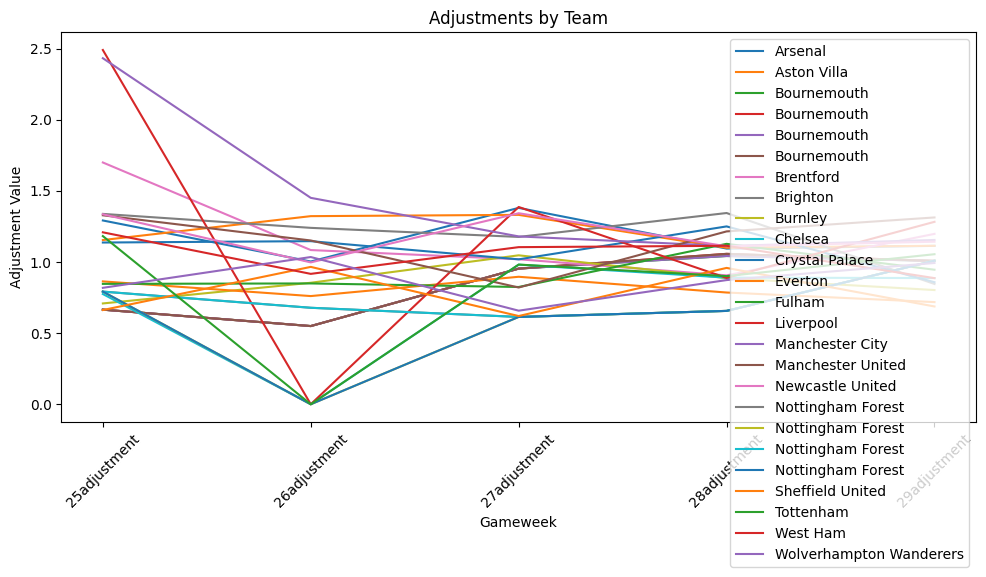

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming gwadjustments2428 is your dataframe containing the data

# Set 'team' column as index
gwadjustments2529.set_index('team', inplace=True)

# Transpose the dataframe
df_transposed = gwadjustments2529.transpose()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for team in df_transposed.columns:
    ax.plot(df_transposed.index.str.replace('gw', ''), df_transposed[team], label=team)

# Customizing the plot
ax.set_title('Adjustments by Team')
ax.set_xlabel('Gameweek')
ax.set_ylabel('Adjustment Value')
ax.legend()
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


In [43]:
rawdfgw228x = pd.merge(rawallplayersallgw,
                     gwadjustments2529,
                     on ='team',
                     how ='left')
rawdfgw228x.rename(columns = {'gw14adjustment_y':'gw14adjustment'}, inplace = True)
rawdfgw228x = rawdfgw228x.round(1)
rawdfgw228x

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,points_per_game,minutes,home_adjustment,xPallgw,xCSP,gw25adjustment,gw26adjustment,gw27adjustment,gw28adjustment,gw29adjustment
0,1,Arsenal,F,Balogun,4.4,0.2,0,0,0,0.0,...,0.0,0,1.2,2.0,NaN,1.3,1.0,1.4,1.1,1.1
1,8,Arsenal,F,G.Jesus,7.9,3.1,4,4,210,121.3,...,3.7,1091,1.2,3.1,NaN,1.3,1.0,1.4,1.1,1.1
2,13,Arsenal,F,Nketiah,5.2,3.7,5,4,197,71.6,...,3.0,1002,1.2,2.8,NaN,1.3,1.0,1.4,1.1,1.1
3,39,Aston Villa,F,Davis,4.9,0.1,0,0,0,0.0,...,0.0,0,1.1,2.0,NaN,1.2,1.3,1.3,1.1,1.1
4,44,Aston Villa,F,Duran,5.0,0.2,2,1,72,20.8,...,1.7,174,1.1,2.2,NaN,1.2,1.3,1.3,1.1,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,647,West Ham,G,Anang,4.0,0.1,0,0,0,0.0,...,0.0,0,1.0,2.0,-0.1,1.2,0.9,1.1,1.1,0.9
1063,546,Wolverhampton Wanderers,G,Bentley,3.9,1.0,0,0,60,5.7,...,5.3,247,0.8,2.0,0.0,0.8,1.0,0.7,0.9,1.0
1064,564,Wolverhampton Wanderers,G,King,3.9,0.7,0,0,0,0.0,...,0.0,0,0.8,2.0,0.0,0.8,1.0,0.7,0.9,1.0
1065,569,Wolverhampton Wanderers,G,José Sá,5.0,1.4,0,0,355,50.1,...,2.9,1912,0.8,2.0,0.0,0.8,1.0,0.7,0.9,1.0


In [44]:
#gw3adjustments = gw3adjustments.groupby('team', as_index=False)['gw3adjustment'].aggregate('sum')
#gw3adjustments

In [45]:
rawdfgw228x['gw25'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw25adjustment)+2)
rawdfgw228x['gw26'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw26adjustment)+2)
rawdfgw228x['gw27'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw27adjustment)+2)
rawdfgw228x['gw28'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw28adjustment)+2)
rawdfgw228x['gw29'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw29adjustment)+2)

rawdfgw228x['5GW Total'] = rawdfgw228x.gw27 + rawdfgw228x.gw28 + rawdfgw228x.gw29 + rawdfgw228x.gw25 + rawdfgw228x.gw26
rawdfgw228x['3GW Total'] = rawdfgw228x.gw27 + rawdfgw228x.gw25 + rawdfgw228x.gw26
rawdfgw228x = rawdfgw228x.drop(columns=[
  'gw27adjustment',
  'gw28adjustment',
  'gw29adjustment',
  'gw25adjustment',
  'gw26adjustment'
  ])
rawdfgw228x

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,home_adjustment,xPallgw,xCSP,gw25,gw26,gw27,gw28,gw29,5GW Total,3GW Total
0,1,Arsenal,F,Balogun,4.4,0.2,0,0,0,0.0,...,1.2,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
1,8,Arsenal,F,G.Jesus,7.9,3.1,4,4,210,121.3,...,1.2,3.1,NaN,3.43,3.10,3.54,3.21,3.21,16.49,10.07
2,13,Arsenal,F,Nketiah,5.2,3.7,5,4,197,71.6,...,1.2,2.8,NaN,3.04,2.80,3.12,2.88,2.88,14.72,8.96
3,39,Aston Villa,F,Davis,4.9,0.1,0,0,0,0.0,...,1.1,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
4,44,Aston Villa,F,Duran,5.0,0.2,2,1,72,20.8,...,1.1,2.2,NaN,2.24,2.26,2.26,2.22,2.22,11.20,6.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,647,West Ham,G,Anang,4.0,0.1,0,0,0,0.0,...,1.0,2.0,-0.1,2.00,2.00,2.00,2.00,2.00,10.00,6.00
1063,546,Wolverhampton Wanderers,G,Bentley,3.9,1.0,0,0,60,5.7,...,0.8,2.0,0.0,2.00,2.00,2.00,2.00,2.00,10.00,6.00
1064,564,Wolverhampton Wanderers,G,King,3.9,0.7,0,0,0,0.0,...,0.8,2.0,0.0,2.00,2.00,2.00,2.00,2.00,10.00,6.00
1065,569,Wolverhampton Wanderers,G,José Sá,5.0,1.4,0,0,355,50.1,...,0.8,2.0,0.0,2.00,2.00,2.00,2.00,2.00,10.00,6.00


In [46]:
rawdfgw228x.drop_duplicates(subset='name', keep='last', inplace=True)
rawdfgw228x

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,home_adjustment,xPallgw,xCSP,gw25,gw26,gw27,gw28,gw29,5GW Total,3GW Total
0,1,Arsenal,F,Balogun,4.4,0.2,0,0,0,0.0,...,1.2,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
1,8,Arsenal,F,G.Jesus,7.9,3.1,4,4,210,121.3,...,1.2,3.1,NaN,3.43,3.10,3.54,3.21,3.21,16.49,10.07
2,13,Arsenal,F,Nketiah,5.2,3.7,5,4,197,71.6,...,1.2,2.8,NaN,3.04,2.80,3.12,2.88,2.88,14.72,8.96
3,39,Aston Villa,F,Davis,4.9,0.1,0,0,0,0.0,...,1.1,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
4,44,Aston Villa,F,Duran,5.0,0.2,2,1,72,20.8,...,1.1,2.2,NaN,2.24,2.26,2.26,2.22,2.22,11.20,6.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,647,West Ham,G,Anang,4.0,0.1,0,0,0,0.0,...,1.0,2.0,-0.1,2.00,2.00,2.00,2.00,2.00,10.00,6.00
1063,546,Wolverhampton Wanderers,G,Bentley,3.9,1.0,0,0,60,5.7,...,0.8,2.0,0.0,2.00,2.00,2.00,2.00,2.00,10.00,6.00
1064,564,Wolverhampton Wanderers,G,King,3.9,0.7,0,0,0,0.0,...,0.8,2.0,0.0,2.00,2.00,2.00,2.00,2.00,10.00,6.00
1065,569,Wolverhampton Wanderers,G,José Sá,5.0,1.4,0,0,355,50.1,...,0.8,2.0,0.0,2.00,2.00,2.00,2.00,2.00,10.00,6.00


In [47]:
from pandas import ExcelWriter
writer = ExcelWriter('API model.xlsx')
rawdfgw228x.to_excel(writer, sheet_name='Sheet1')
gwadjustments2529.to_excel(writer, sheet_name='Sheet2')
#fplwithunderstat.to_excel(writer, sheet_name='Sheet3')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

<ipython-input-47-9a0d8c4c5071>:8: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [48]:
#from google.colab import drive
#drive.mount('/content/drive')

In [49]:
import shutil

In [50]:
#shutil.copy("/content/API model.xlsx","/content/drive/MyDrive/FPL")

In [51]:
rawdfgw228x.nlargest(50, '5GW Total')

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,home_adjustment,xPallgw,xCSP,gw25,gw26,gw27,gw28,gw29,5GW Total,3GW Total
374,308,Liverpool,M,Salah,13.0,18.6,14,8,469,233.1,...,1.2,5.6,NaN,11.00,2.00,7.04,5.24,6.68,31.96,20.04
86,355,Manchester City,F,Haaland,14.4,70.8,16,6,494,183.8,...,1.3,4.9,NaN,8.96,6.35,5.48,5.19,5.48,31.46,20.79
145,19,Arsenal,M,Saka,9.0,59.2,10,8,514,250.3,...,1.2,5.1,NaN,6.03,5.10,6.34,5.41,5.41,28.29,17.47
84,343,Manchester City,F,J.Alvarez,6.8,28.1,8,8,486,198.8,...,1.3,4.1,NaN,7.04,5.15,4.52,4.31,4.52,25.54,16.71
60,293,Liverpool,F,Darwin,7.6,18.3,8,9,291,171.6,...,1.2,4.4,NaN,8.00,2.00,5.36,4.16,5.12,24.64,15.36
5,60,Aston Villa,F,Watkins,8.7,50.8,11,14,480,205.9,...,1.1,4.3,NaN,4.76,4.99,4.99,4.53,4.53,23.80,14.74
231,108,Brentford,M,Mbeumo,6.8,6.2,7,4,250,122.1,...,1.1,4.2,NaN,5.74,4.42,4.20,3.98,4.64,22.98,14.36
438,353,Manchester City,M,Foden,8.0,30.7,8,7,492,197.2,...,1.3,3.7,NaN,6.08,4.55,4.04,3.87,4.04,22.58,14.67
462,373,Manchester United,M,B.Fernandes,8.2,10.0,3,5,395,198.3,...,1.1,3.9,NaN,4.47,4.28,3.52,4.28,4.47,21.02,12.27
567,526,West Ham,M,Bowen,7.8,18.9,11,2,326,162.3,...,1.0,4.1,NaN,4.52,3.89,4.31,4.31,3.89,20.92,12.72


In [52]:
rawdfgw228x.nlargest(50, '3GW Total')

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,home_adjustment,xPallgw,xCSP,gw25,gw26,gw27,gw28,gw29,5GW Total,3GW Total
86,355,Manchester City,F,Haaland,14.4,70.8,16,6,494,183.8,...,1.3,4.9,NaN,8.96,6.35,5.48,5.19,5.48,31.46,20.79
374,308,Liverpool,M,Salah,13.0,18.6,14,8,469,233.1,...,1.2,5.6,NaN,11.00,2.00,7.04,5.24,6.68,31.96,20.04
145,19,Arsenal,M,Saka,9.0,59.2,10,8,514,250.3,...,1.2,5.1,NaN,6.03,5.10,6.34,5.41,5.41,28.29,17.47
84,343,Manchester City,F,J.Alvarez,6.8,28.1,8,8,486,198.8,...,1.3,4.1,NaN,7.04,5.15,4.52,4.31,4.52,25.54,16.71
60,293,Liverpool,F,Darwin,7.6,18.3,8,9,291,171.6,...,1.2,4.4,NaN,8.00,2.00,5.36,4.16,5.12,24.64,15.36
5,60,Aston Villa,F,Watkins,8.7,50.8,11,14,480,205.9,...,1.1,4.3,NaN,4.76,4.99,4.99,4.53,4.53,23.80,14.74
438,353,Manchester City,M,Foden,8.0,30.7,8,7,492,197.2,...,1.3,3.7,NaN,6.08,4.55,4.04,3.87,4.04,22.58,14.67
231,108,Brentford,M,Mbeumo,6.8,6.2,7,4,250,122.1,...,1.1,4.2,NaN,5.74,4.42,4.20,3.98,4.64,22.98,14.36
801,342,Manchester City,D,Aké,5.0,7.1,2,3,333,64.2,...,1.3,3.4,0.8,5.36,4.10,3.68,3.54,3.68,20.36,13.14
567,526,West Ham,M,Bowen,7.8,18.9,11,2,326,162.3,...,1.0,4.1,NaN,4.52,3.89,4.31,4.31,3.89,20.92,12.72


In [53]:
Top50 = rawdfgw228x.nlargest(50, '5GW Total')
Top50

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,home_adjustment,xPallgw,xCSP,gw25,gw26,gw27,gw28,gw29,5GW Total,3GW Total
374,308,Liverpool,M,Salah,13.0,18.6,14,8,469,233.1,...,1.2,5.6,NaN,11.00,2.00,7.04,5.24,6.68,31.96,20.04
86,355,Manchester City,F,Haaland,14.4,70.8,16,6,494,183.8,...,1.3,4.9,NaN,8.96,6.35,5.48,5.19,5.48,31.46,20.79
145,19,Arsenal,M,Saka,9.0,59.2,10,8,514,250.3,...,1.2,5.1,NaN,6.03,5.10,6.34,5.41,5.41,28.29,17.47
84,343,Manchester City,F,J.Alvarez,6.8,28.1,8,8,486,198.8,...,1.3,4.1,NaN,7.04,5.15,4.52,4.31,4.52,25.54,16.71
60,293,Liverpool,F,Darwin,7.6,18.3,8,9,291,171.6,...,1.2,4.4,NaN,8.00,2.00,5.36,4.16,5.12,24.64,15.36
5,60,Aston Villa,F,Watkins,8.7,50.8,11,14,480,205.9,...,1.1,4.3,NaN,4.76,4.99,4.99,4.53,4.53,23.80,14.74
231,108,Brentford,M,Mbeumo,6.8,6.2,7,4,250,122.1,...,1.1,4.2,NaN,5.74,4.42,4.20,3.98,4.64,22.98,14.36
438,353,Manchester City,M,Foden,8.0,30.7,8,7,492,197.2,...,1.3,3.7,NaN,6.08,4.55,4.04,3.87,4.04,22.58,14.67
462,373,Manchester United,M,B.Fernandes,8.2,10.0,3,5,395,198.3,...,1.1,3.9,NaN,4.47,4.28,3.52,4.28,4.47,21.02,12.27
567,526,West Ham,M,Bowen,7.8,18.9,11,2,326,162.3,...,1.0,4.1,NaN,4.52,3.89,4.31,4.31,3.89,20.92,12.72


In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string

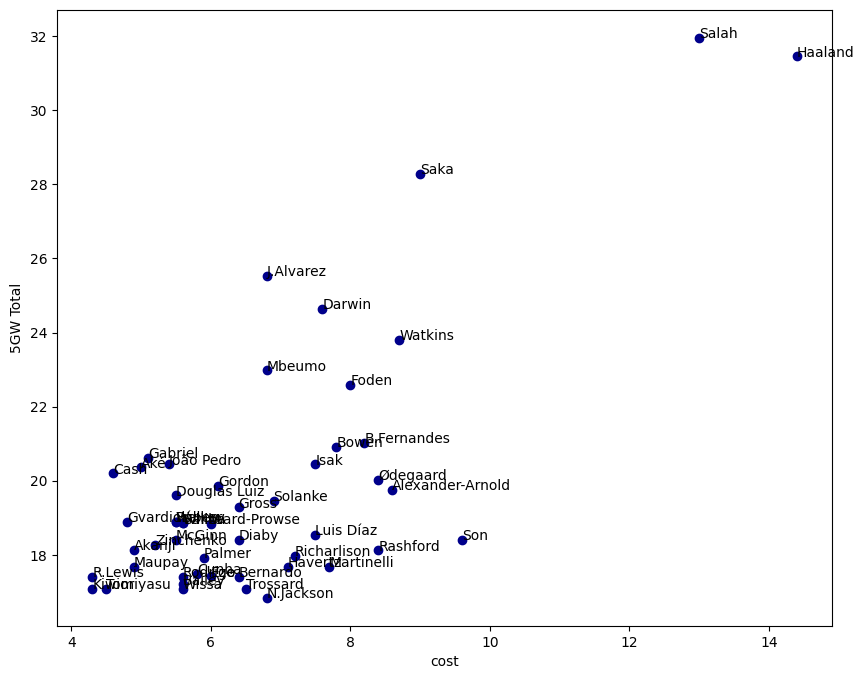

In [55]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.scatter(x=Top50['cost'],y=Top50['5GW Total'],c='DarkBlue')
# set labels
ax.set_xlabel('cost')
ax.set_ylabel('5GW Total')

# annotate points in axis
for idx, row in Top50.iterrows():
    ax.annotate(row['name'], (row['cost'], row['5GW Total']) )
# force matplotlib to draw the graph
plt.show()

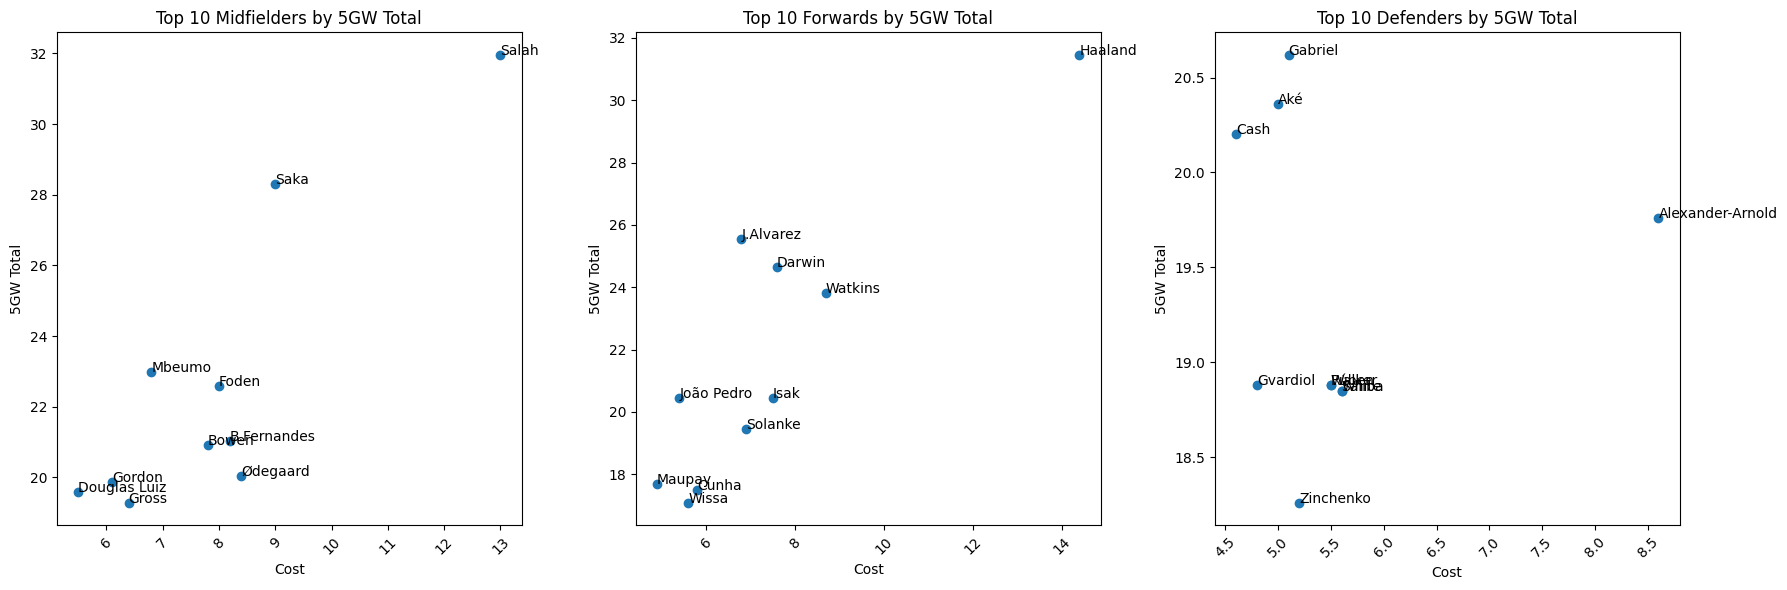

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'Top50'

# Filter the DataFrame by position type
midfielders = Top50[Top50['pos'] == 'M']
forwards = Top50[Top50['pos'] == 'F']
defenders = Top50[Top50['pos'] == 'D']

# Plotting the scatter plots
plt.figure(figsize=(18, 6))

# Midfielders scatter plot
plt.subplot(131)
plt.scatter(midfielders['cost'][:10], midfielders['5GW Total'][:10])
plt.title('Top 10 Midfielders by 5GW Total')
plt.xlabel('Cost')
plt.ylabel('5GW Total')
plt.xticks(rotation=45)
for idx, row in midfielders.head(10).iterrows():
    plt.annotate(row['name'], (row['cost'], row['5GW Total']))

# Forwards scatter plot
plt.subplot(132)
plt.scatter(forwards['cost'][:10], forwards['5GW Total'][:10])
plt.title('Top 10 Forwards by 5GW Total')
plt.xlabel('Cost')
plt.ylabel('5GW Total')
plt.xticks(rotation=45)
for idx, row in forwards.head(10).iterrows():
    plt.annotate(row['name'], (row['cost'], row['5GW Total']))

# Defenders scatter plot
plt.subplot(133)
plt.scatter(defenders['cost'][:10], defenders['5GW Total'][:10])
plt.title('Top 10 Defenders by 5GW Total')
plt.xlabel('Cost')
plt.ylabel('5GW Total')
plt.xticks(rotation=45)
for idx, row in defenders.head(10).iterrows():
    plt.annotate(row['name'], (row['cost'], row['5GW Total']))

plt.tight_layout()
plt.show()


In [57]:
rawdfgw228x

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,home_adjustment,xPallgw,xCSP,gw25,gw26,gw27,gw28,gw29,5GW Total,3GW Total
0,1,Arsenal,F,Balogun,4.4,0.2,0,0,0,0.0,...,1.2,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
1,8,Arsenal,F,G.Jesus,7.9,3.1,4,4,210,121.3,...,1.2,3.1,NaN,3.43,3.10,3.54,3.21,3.21,16.49,10.07
2,13,Arsenal,F,Nketiah,5.2,3.7,5,4,197,71.6,...,1.2,2.8,NaN,3.04,2.80,3.12,2.88,2.88,14.72,8.96
3,39,Aston Villa,F,Davis,4.9,0.1,0,0,0,0.0,...,1.1,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
4,44,Aston Villa,F,Duran,5.0,0.2,2,1,72,20.8,...,1.1,2.2,NaN,2.24,2.26,2.26,2.22,2.22,11.20,6.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,647,West Ham,G,Anang,4.0,0.1,0,0,0,0.0,...,1.0,2.0,-0.1,2.00,2.00,2.00,2.00,2.00,10.00,6.00
1063,546,Wolverhampton Wanderers,G,Bentley,3.9,1.0,0,0,60,5.7,...,0.8,2.0,0.0,2.00,2.00,2.00,2.00,2.00,10.00,6.00
1064,564,Wolverhampton Wanderers,G,King,3.9,0.7,0,0,0,0.0,...,0.8,2.0,0.0,2.00,2.00,2.00,2.00,2.00,10.00,6.00
1065,569,Wolverhampton Wanderers,G,José Sá,5.0,1.4,0,0,355,50.1,...,0.8,2.0,0.0,2.00,2.00,2.00,2.00,2.00,10.00,6.00


In [58]:
apiplayers = master

In [59]:
Mostselected = apiplayers.nlargest(20, 'selected_by_percent')
Mostselected

,id,team,pos,name,cost,selected_by_percent,expected_goals,expected_assists,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,apppoint,assistvalue
499,355,Manchester City,F,Haaland,14.4,70.8,16.57,1.35,16,6,494,183.8,131,7.3,1488,2,3
17,19,Arsenal,M,Saka,9.0,59.2,10.17,7.51,10,8,514,250.3,144,6.3,1987,2,3
63,60,Aston Villa,F,Watkins,8.7,50.8,11.25,3.17,11,14,480,205.9,148,6.2,2119,2,3
587,430,Newcastle United,D,Trippier,6.8,41.6,0.58,6.46,1,10,551,170.7,106,4.8,1932,2,3
276,362,Chelsea,M,Palmer,5.9,38.6,8.00,4.45,10,7,413,157.6,122,5.8,1504,2,3
18,20,Arsenal,D,Saliba,5.6,36.0,1.42,0.67,2,1,470,68.2,96,4.0,2160,2,3
742,524,West Ham,G,Areola,4.2,35.7,0.00,0.00,0,0,389,61.5,81,3.9,1845,2,3
714,506,Tottenham,D,Pedro Porro,5.8,31.8,2.21,4.73,0,8,510,144.2,87,3.8,2067,2,3
494,349,Manchester City,M,De Bruyne,10.8,31.3,0.56,1.18,1,4,104,36.4,29,5.8,236,2,3
497,353,Manchester City,M,Foden,8.0,30.7,5.56,4.14,8,7,492,197.2,127,5.5,1860,2,3


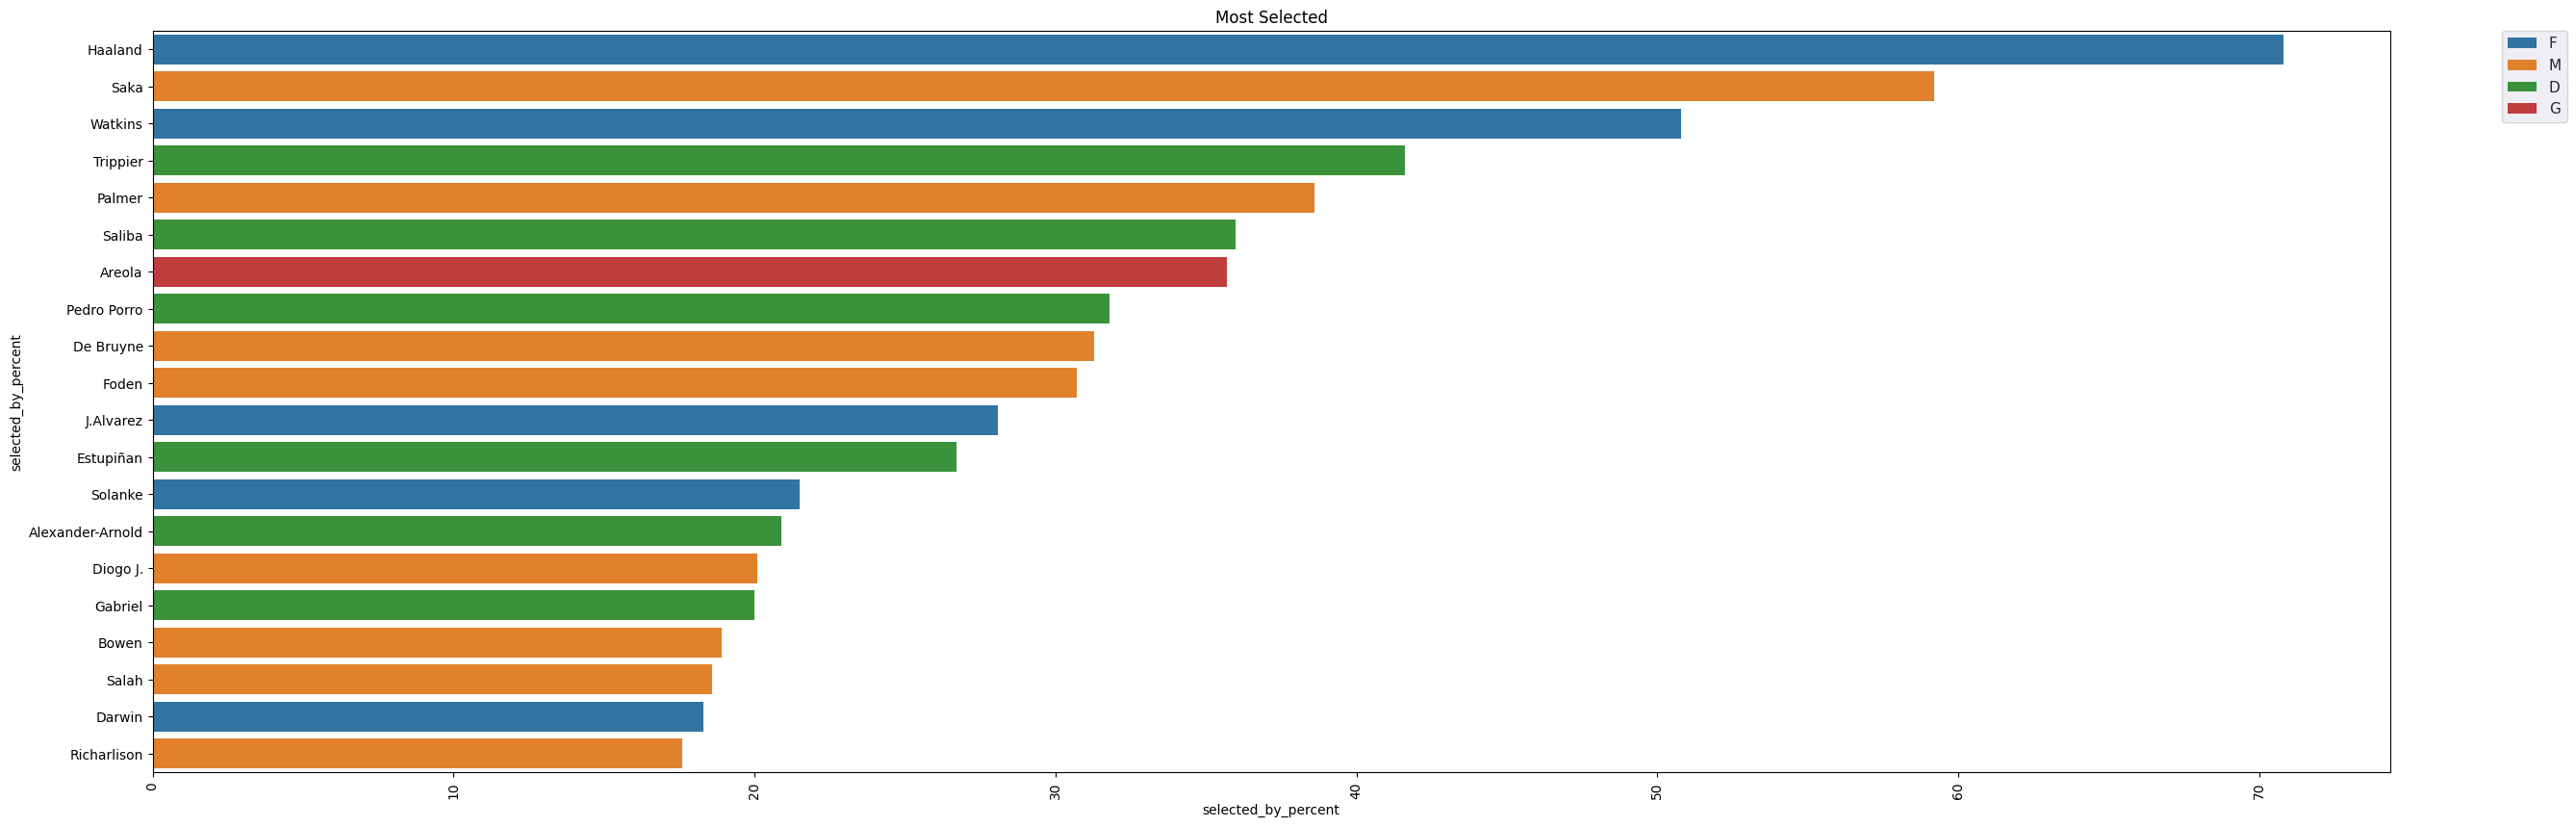

In [60]:
ax = sns.barplot(x='selected_by_percent', y='name', data=Mostselected, hue='pos', dodge=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Most Selected")
plt.xticks(rotation=90)
plt.ylabel("selected_by_percent")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.gcf().set_size_inches(30,10)

In [61]:
fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltablexGxGc = epltable.drop(columns=[
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])
epltablexGxGc= epltablexGxGc.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc= epltablexGxGc.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc= epltablexGxGc.replace('Leeds United','Leeds')
epltablexGxGc= epltablexGxGc.replace('Leicester City','Leicester')
epltablexGxGc= epltablexGxGc.replace('Manchester Utd','Manchester United')
epltablexGxGc['Squad'] = epltablexGxGc['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc= epltablexGxGc.replace('Nottham Forest','Nottingham Forest')
epltablexGxGc['xCSP'] = (4 - (epltablexGxGc.xGA * 4/21))
epltablexGxGc.rename(columns={'Squad': 'team'}, inplace=True)
epltablexGxGc['xG/90'] = (epltablexGxGc.xG / epltablexGxGc.MP)
epltablexGxGc['xGA/90'] = (epltablexGxGc.xGA / epltablexGxGc.MP)
epltablexGxGc

<ipython-input-61-ccafbf71d20a>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  epltablexGxGc['Squad'] = epltablexGxGc['Squad'].str.replace(r"[\"\',]", '')


,Rk,team,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,xCSP,xG/90,xGA/90
0,1,Liverpool,24,16,6,2,55,23,32,54,2.25,51.7,29.4,22.4,0.93,-1.600000,2.154167,1.225000
1,2,Manchester City,23,16,4,3,56,25,31,52,2.26,45.1,21.9,23.2,1.01,-0.171429,1.960870,0.952174
2,3,Arsenal,24,16,4,4,53,22,31,52,2.17,47.9,17.7,30.1,1.26,0.628571,1.995833,0.737500
3,4,Tottenham,24,14,5,5,51,36,15,47,1.96,41.9,40.9,1.0,0.04,-3.790476,1.745833,1.704167
4,5,Aston Villa,24,14,4,6,50,32,18,46,1.92,43.2,32.5,10.7,0.45,-2.190476,1.800000,1.354167
5,6,Manchester United,24,13,2,9,33,33,0,41,1.71,35.7,39.6,-3.9,-0.16,-3.542857,1.487500,1.650000
6,7,Newcastle United,24,11,3,10,51,39,12,36,1.50,45.9,41.8,4.2,0.17,-3.961905,1.912500,1.741667
7,8,West Ham,24,10,6,8,36,42,-6,36,1.50,32.9,43.2,-10.3,-0.43,-4.228571,1.370833,1.800000
8,9,Brighton,24,9,8,7,43,40,3,35,1.46,39.5,35.8,3.7,0.15,-2.819048,1.645833,1.491667
9,10,Chelsea,24,10,4,10,41,40,1,34,1.42,45.1,35.1,10.0,0.42,-2.685714,1.879167,1.462500


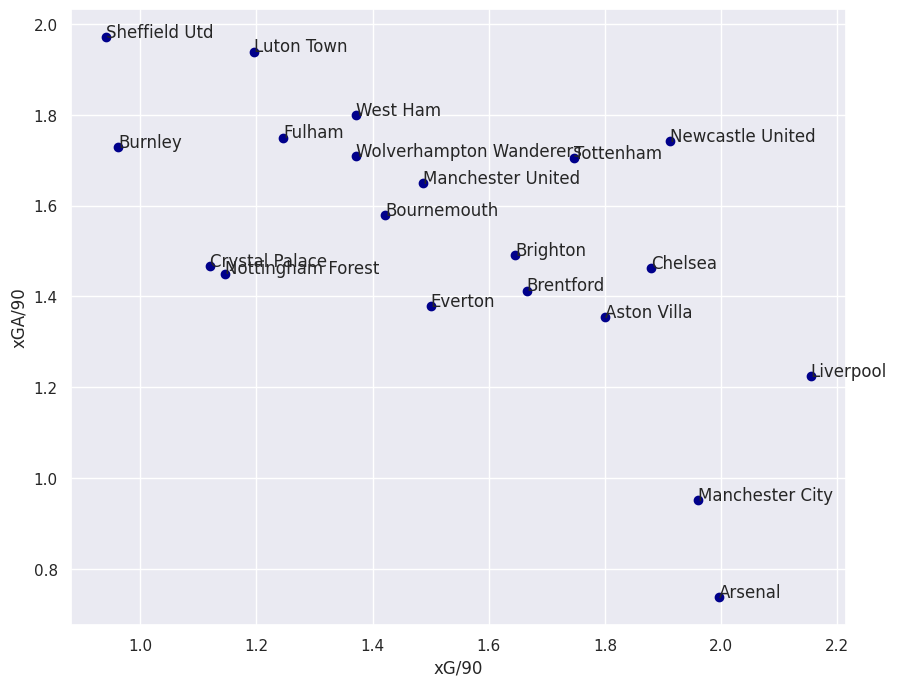

In [62]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.scatter(x=epltablexGxGc['xG/90'],y=epltablexGxGc['xGA/90'],c='DarkBlue')
# set labels
ax.set_xlabel('xG/90')
ax.set_ylabel('xGA/90')

# annotate points in axis
for idx, row in epltablexGxGc.iterrows():
    ax.annotate(row['team'], (row['xG/90'], row['xGA/90']) )
# force matplotlib to draw the graph
plt.show()

In [63]:
EPL_player_df

,id,player_name,games_x,time_x,goals_1wks_x,xG_1wks_x,assists_1wks_x,xA_1wks_x,shots_1wks_x,key_passes_1wks_x,...,shots_1wks_y,key_passes_1wks_y,yellow_cards,red_cards,position_y,team_title_y,npg_1wks_y,npxG_1wks_y,xGChain,xGBuildup
0,8260,Erling Haaland,18,1501,16,18.022195667028427,5,3.8449194002896547,67,20,...,67,20,1,0,F S,Manchester City,13,14.977520495653152,17.895127840340137,1.396927049383521
1,1250,Mohamed Salah,20,1768,14,13.610325902700424,8,9.57847910746932,65,47,...,65,47,2,0,F,Liverpool,10,9.043387070298195,19.68034301698208,5.720102474093437
2,1679,Dominic Solanke,23,2063,13,13.548960637301207,2,2.057882908731699,73,19,...,73,19,2,0,F,Bournemouth,12,12.787791784852743,13.522991098463535,2.099664594978094
3,453,Son Heung-Min,21,1761,12,7.47495724260807,6,7.470194164663553,52,39,...,52,39,1,0,F M S,Tottenham,11,6.713788405060768,17.541908875107765,6.833345143124461
4,1776,Jarrod Bowen,23,2070,11,9.208921555429697,2,3.3299051355570555,58,16,...,58,16,2,0,F M,West Ham,11,9.208921555429697,11.028739746659994,2.1006914749741554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,12340,Omari Forson,1,1,0,0,1,0.03417201712727547,0,1,...,0,1,0,0,S,Manchester United,0,0,0.03417201712727547,0
532,12408,Daniel Muñoz,2,180,0,0,0,0.12150418758392334,0,3,...,0,3,2,0,D,Crystal Palace,0,0,0.18484486639499664,0.0633406788110733
533,12409,Adam Wharton,2,153,0,0,0,0.04752231389284134,0,1,...,0,1,0,0,M S,Crystal Palace,0,0,0.2653939016163349,0.21787158027291298
534,12412,Morgan Rogers,1,5,0,0.13150881230831146,0,0,1,0,...,1,0,0,0,S,Aston Villa,0,0.13150881230831146,0.13150881230831146,0


In [64]:
EPL_player_df['goals'] = EPL_player_df['goals_1wks_x'].astype(int)
top25goals = EPL_player_df.nlargest(20, 'goals')
top25goals

,id,player_name,games_x,time_x,goals_1wks_x,xG_1wks_x,assists_1wks_x,xA_1wks_x,shots_1wks_x,key_passes_1wks_x,...,key_passes_1wks_y,yellow_cards,red_cards,position_y,team_title_y,npg_1wks_y,npxG_1wks_y,xGChain,xGBuildup,goals
0,8260,Erling Haaland,18,1501,16,18.022195667028427,5,3.8449194002896547,67,20,...,20,1,0,F S,Manchester City,13,14.977520495653152,17.895127840340137,1.396927049383521,16
1,1250,Mohamed Salah,20,1768,14,13.610325902700424,8,9.57847910746932,65,47,...,47,2,0,F,Liverpool,10,9.043387070298195,19.68034301698208,5.720102474093437,14
2,1679,Dominic Solanke,23,2063,13,13.548960637301207,2,2.057882908731699,73,19,...,19,2,0,F,Bournemouth,12,12.787791784852743,13.522991098463535,2.099664594978094,13
3,453,Son Heung-Min,21,1761,12,7.47495724260807,6,7.470194164663553,52,39,...,39,1,0,F M S,Tottenham,11,6.713788405060768,17.541908875107765,6.833345143124461,12
4,1776,Jarrod Bowen,23,2070,11,9.208921555429697,2,3.3299051355570555,58,16,...,16,2,0,F M,West Ham,11,9.208921555429697,11.028739746659994,2.1006914749741554,11
5,8865,Ollie Watkins,24,2139,11,13.107993803918362,10,5.417534623295069,71,35,...,35,4,0,F,Aston Villa,11,13.107993803918362,19.81237354874611,2.7841674499213696,11
6,5232,Alexander Isak,17,1203,10,10.637801833450794,0,1.3759422898292542,38,12,...,12,0,0,F S,Newcastle United,8,9.115464098751545,11.533038780093193,2.939927790313959,10
7,6026,Richarlison,21,1306,10,8.850427089259028,3,1.6384554393589497,53,14,...,14,3,0,F M S,Tottenham,10,8.850427089259028,11.777015812695026,2.2480600606650114,10
8,7322,Bukayo Saka,23,2019,10,11.06239853054285,6,7.771896228194237,68,59,...,59,2,0,F,Arsenal,7,8.778892070055008,20.955734759569168,8.900185596197844,10
9,8497,Cole Palmer,21,1505,10,8.33049844764173,6,5.819747157394886,48,32,...,32,6,0,F M S,"Chelsea,Manchester City",5,4.524654181674123,14.11112436838448,6.3188710659742355,10


In [65]:
EPL_player_df['assists'] = EPL_player_df['assists_1wks_x'].astype(int)
top25assists = EPL_player_df.nlargest(20, 'assists')
top25assists

,id,player_name,games_x,time_x,goals_1wks_x,xG_1wks_x,assists_1wks_x,xA_1wks_x,shots_1wks_x,key_passes_1wks_x,...,yellow_cards,red_cards,position_y,team_title_y,npg_1wks_y,npxG_1wks_y,xGChain,xGBuildup,goals,assists
5,8865,Ollie Watkins,24,2139,11,13.107993803918362,10,5.417534623295069,71,35,...,4,0,F,Aston Villa,11,13.107993803918362,19.81237354874611,2.7841674499213696,11,10
156,652,Kieran Trippier,22,1949,1,0.5851622633635998,10,8.289522988721728,7,62,...,5,0,D,Newcastle United,1,0.5851622633635998,13.290279868990183,9.889573726803064,1,10
1,1250,Mohamed Salah,20,1768,14,13.610325902700424,8,9.57847910746932,65,47,...,2,0,F,Liverpool,10,9.043387070298195,19.68034301698208,5.720102474093437,14,8
52,239,Pascal Groß,22,1910,4,4.2632853500545025,8,5.995012725703418,41,58,...,3,0,D M S,Brighton,3,3.5021165125072002,15.361315950751305,11.628522036597133,4,8
120,6382,Pedro Neto,15,1245,2,2.9955161847174168,8,4.63976775854826,30,34,...,4,0,F M S,Wolverhampton Wanderers,2,2.9955161847174168,7.305020127445459,1.5774471051990986,2,8
15,6055,Phil Foden,23,1870,8,6.233714668080211,7,5.315098576247692,61,46,...,1,0,F M S,Manchester City,8,6.233714668080211,16.879532620310783,9.455234920606017,8,7
17,10720,Darwin Núñez,23,1416,8,14.306162954308093,7,4.797008647583425,78,26,...,8,0,F S,Liverpool,8,13.544994057156146,18.505226369947195,3.0453371480107307,8,7
349,6912,Pedro Porro,23,2070,0,2.0977757312357426,7,5.757544359192252,37,40,...,3,0,D,Tottenham,0,2.0977757312357426,13.497159967198968,10.500741556286812,0,7
3,453,Son Heung-Min,21,1761,12,7.47495724260807,6,7.470194164663553,52,39,...,1,0,F M S,Tottenham,11,6.713788405060768,17.541908875107765,6.833345143124461,12,6
8,7322,Bukayo Saka,23,2019,10,11.06239853054285,6,7.771896228194237,68,59,...,2,0,F,Arsenal,7,8.778892070055008,20.955734759569168,8.900185596197844,10,6


In [66]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [67]:
fig3= go.Figure()
fig3.add_trace(go.Scatter(x = top25goals["goals"],
                          y = top25goals["player_name"],
                          mode = 'markers',
                          marker_color = 'darkblue',
                          marker_size = 10,
                          name = 'goals'))
fig3.add_trace(go.Scatter(x = top25goals["xG_1wks_x"],
                          y = top25goals["player_name"],
                          mode = 'markers',
                          marker_color = 'darkorange',
                          marker_size = 10,
                          name = 'xG'))
for i in range(0, len(top25goals)):
               fig3.add_shape(type='line',
                              x0 = top25goals["goals"][i],
                              y0 = i,
                              x1 = top25goals["xG_1wks_x"][i],
                              y1 = i,
                              line=dict(color='crimson', width = 3))
fig3.update_layout(title_text =
                    "Goals vs xG",
                    title_font_size = 30)
fig3.update_xaxes(range=[0, 30])
fig3.show()

In [68]:
seasonedit = one_game_df.drop(columns=[ 'yellow_cards','red_cards','time'])

In [69]:
top25assists.columns

Index(['id', 'player_name', 'games_x', 'time_x', 'goals_1wks_x', 'xG_1wks_x',
       'assists_1wks_x', 'xA_1wks_x', 'shots_1wks_x', 'key_passes_1wks_x',
       'yellow_cards_x', 'red_cards_x', 'position_x', 'team_title_x',
       'npg_1wks_x', 'npxG_1wks_x', 'xGChain_x', 'xGBuildup_x', 'games_y',
       'time_y', 'goals_season', 'xG_season', 'assists_season', 'xA_season',
       'shots_season', 'key_passes_season', 'yellow_cards_y', 'red_cards_y',
       'npg_season', 'npxG_season', 'xGChain_y', 'xGBuildup_y', 'games',
       'time', 'goals_1wks_y', 'xG_1wks_y', 'assists_1wks_y', 'xA_1wks_y',
       'shots_1wks_y', 'key_passes_1wks_y', 'yellow_cards', 'red_cards',
       'position_y', 'team_title_y', 'npg_1wks_y', 'npxG_1wks_y', 'xGChain',
       'xGBuildup', 'goals', 'assists'],
      dtype='object')

In [70]:
top20assists = top25assists.drop(columns=[ 'shots_1wks_x', 'key_passes_1wks_x',
       'yellow_cards_x', 'red_cards_x', 'position_x', 'team_title_x',
       'npg_1wks_x', 'npxG_1wks_x', 'xGChain_x', 'xGBuildup_x', 'games_y',
       'time_y', 'goals_season', 'xG_season', 'assists_season', 'xA_season',
       'shots_season', 'key_passes_season', 'yellow_cards_y', 'red_cards_y',
       'npg_season', 'npxG_season', 'xGChain_y', 'xGBuildup_y', 'games',
       'time', 'goals_1wks_y', 'xG_1wks_y', 'assists_1wks_y', 'xA_1wks_y',
       'shots_1wks_y', 'key_passes_1wks_y', 'yellow_cards', 'red_cards',
       'position_y', 'team_title_y', 'npg_1wks_y', 'npxG_1wks_y', 'xGChain',
       'xGBuildup', 'assists_1wks_x', 'games_x', 'time_x', 'goals_1wks_x', 'id' ])

top20assists.reset_index(inplace = True,drop = True)
top20assists

,player_name,xG_1wks_x,xA_1wks_x,goals,assists
0,Ollie Watkins,13.107993803918362,5.417534623295069,11,10
1,Kieran Trippier,0.5851622633635998,8.289522988721728,1,10
2,Mohamed Salah,13.610325902700424,9.57847910746932,14,8
3,Pascal Groß,4.2632853500545025,5.995012725703418,4,8
4,Pedro Neto,2.9955161847174168,4.63976775854826,2,8
5,Phil Foden,6.233714668080211,5.315098576247692,8,7
6,Darwin Núñez,14.306162954308093,4.797008647583425,8,7
7,Pedro Porro,2.0977757312357426,5.757544359192252,0,7
8,Son Heung-Min,7.47495724260807,7.470194164663553,12,6
9,Bukayo Saka,11.06239853054285,7.771896228194237,10,6


In [71]:
fig4= go.Figure()
fig4.add_trace(go.Scatter(x = top20assists["assists"],
                          y = top20assists["player_name"],
                          mode = 'markers',
                          marker_color = 'darkblue',
                          marker_size = 10,
                          name = 'assists'))
fig4.add_trace(go.Scatter(x = top20assists["xA_1wks_x"],
                          y = top20assists["player_name"],
                          mode = 'markers',
                          marker_color = 'darkorange',
                          marker_size = 10,
                          name = 'xA'))
for i in range(0, len(top20assists)):
               fig4.add_shape(type='line',
                              x0 = top20assists['assists'][i],
                              y0 = i,
                              x1 = top20assists["xA_1wks_x"][i],
                              y1 = i,
                              line=dict(color='crimson', width = 3))
fig4.update_layout(title_text =
                    "assists vs xA",
                    title_font_size = 15)
fig4.update_xaxes(range=[0, 15])
fig4.show()

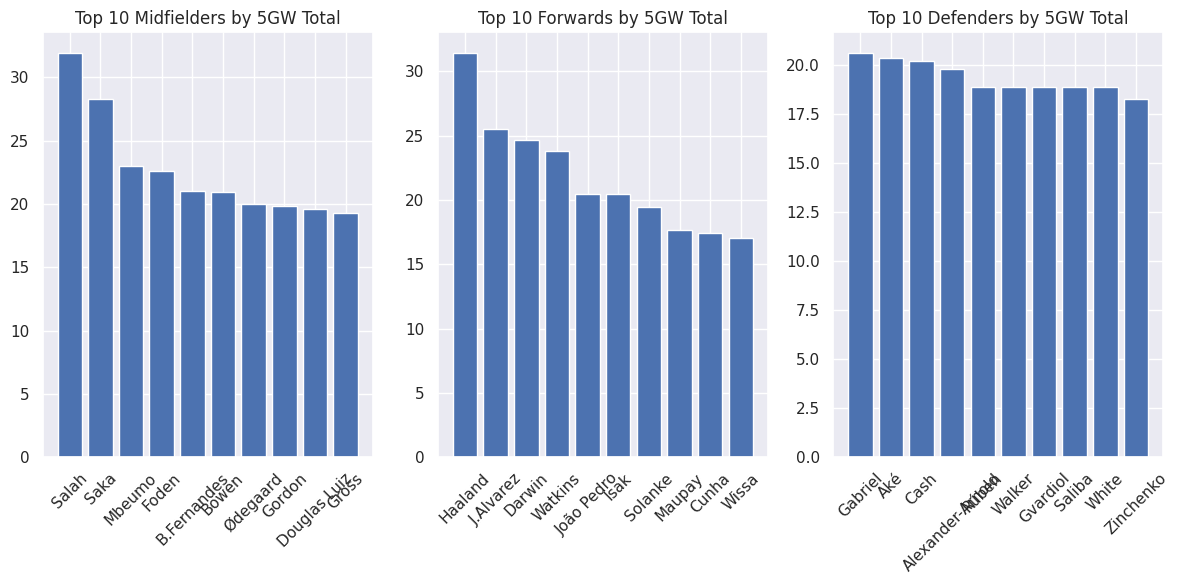

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'Top50'

# Filter the DataFrame by position type
midfielders = Top50[Top50['pos'] == 'M']
forwards = Top50[Top50['pos'] == 'F']
defenders = Top50[Top50['pos'] == 'D']

# Sort the filtered DataFrames by '5GW Total' in descending order
midfielders = midfielders.sort_values(by='5GW Total', ascending=False)
forwards = forwards.sort_values(by='5GW Total', ascending=False)
defenders = defenders.sort_values(by='5GW Total', ascending=False)

# Plotting the bar charts
plt.figure(figsize=(12, 6))

# Midfielders chart
plt.subplot(131)
plt.bar(midfielders['name'][:10], midfielders['5GW Total'][:10])
plt.title('Top 10 Midfielders by 5GW Total')
plt.xticks(rotation=45)

# Forwards chart
plt.subplot(132)
plt.bar(forwards['name'][:10], forwards['5GW Total'][:10])
plt.title('Top 10 Forwards by 5GW Total')
plt.xticks(rotation=45)

# Defenders chart
plt.subplot(133)
plt.bar(defenders['name'][:10], defenders['5GW Total'][:10])
plt.title('Top 10 Defenders by 5GW Total')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


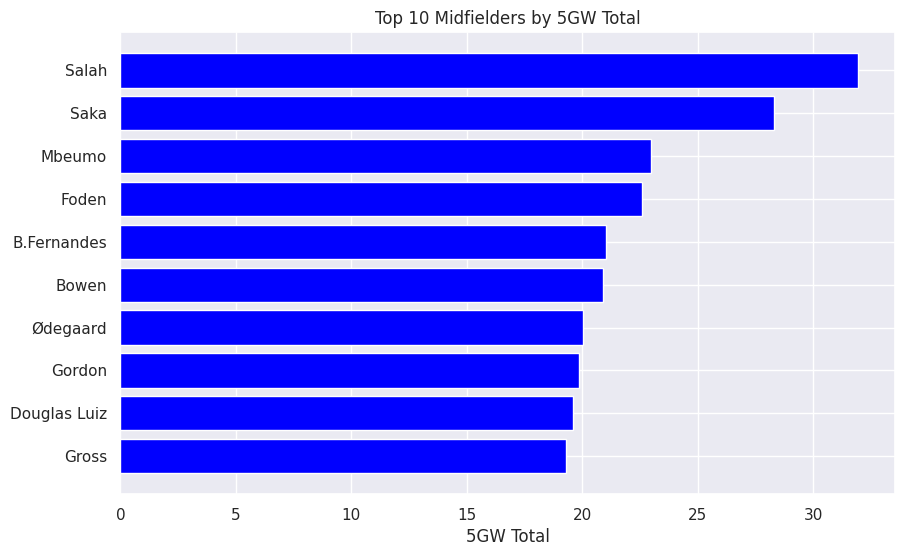

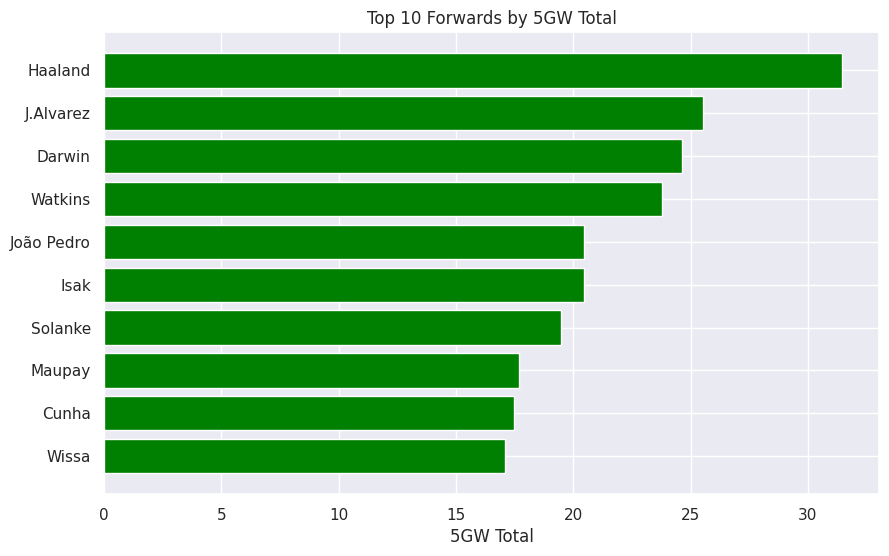

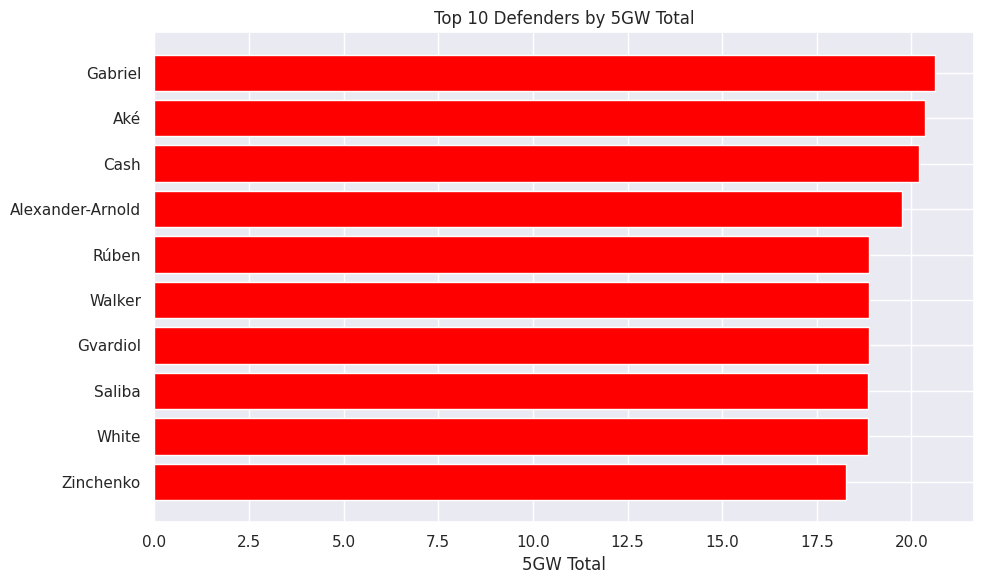

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'Top50'

# Filter the DataFrame by position type
midfielders = Top50[Top50['pos'] == 'M']
forwards = Top50[Top50['pos'] == 'F']
defenders = Top50[Top50['pos'] == 'D']

# Sort the filtered DataFrames by '5GW Total' in descending order
midfielders = midfielders.sort_values(by='5GW Total', ascending=False)
forwards = forwards.sort_values(by='5GW Total', ascending=False)
defenders = defenders.sort_values(by='5GW Total', ascending=False)

# Create a list of colors for each chart
colors = ['blue', 'green', 'red']

# Plotting the horizontal bar charts with different colors
plt.figure(figsize=(10, 6))

# Midfielders chart
plt.barh(midfielders['name'][:10], midfielders['5GW Total'][:10], color=colors[0])
plt.title('Top 10 Midfielders by 5GW Total')
plt.xlabel('5GW Total')
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top

# Forwards chart
plt.figure(figsize=(10, 6))
plt.barh(forwards['name'][:10], forwards['5GW Total'][:10], color=colors[1])
plt.title('Top 10 Forwards by 5GW Total')
plt.xlabel('5GW Total')
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top

# Defenders chart
plt.figure(figsize=(10, 6))
plt.barh(defenders['name'][:10], defenders['5GW Total'][:10], color=colors[2])
plt.title('Top 10 Defenders by 5GW Total')
plt.xlabel('5GW Total')
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top

plt.tight_layout()
plt.show()


In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'gwadjustments26'

# Sort the DataFrame by values in descending order
gw25adjustments_sorted = gw25adjustments.sort_values(by=gw25adjustments.columns[0], ascending=False)

# Define custom color map with red, orange, and green
custom_colors = ["#FF0000", "#FFA500", "#00FF00"]
custom_cmap = sns.color_palette(custom_colors, as_cmap=True)

# Plot the heatmap with custom colors
plt.figure(figsize=(8, 6))
sns.heatmap(gw25adjustments_sorted, annot=True, cmap=custom_cmap, center=1,
            vmin=0.9, vmax=1.1, cbar_kws={'ticks': [0.9, 1, 1.1], 'format': '%.1f'})
plt.title('Color-Coded Table of GW Adjustments (Custom Colors)')
plt.show()



ValueError: could not convert string to float: 'Wolverhampton Wanderers'

<Figure size 800x600 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'gwadjustments21'

# Sort the DataFrame by values in descending order
gw21adjustments_sorted = gw21adjustments.sort_values(by='gw21adjustment', ascending=False)

# Define custom color map with red, orange, and green
custom_colors = ["#FF0000", "#FFA500", "#00FF00"]
custom_cmap = sns.color_palette(custom_colors)

# Set the figure size
plt.figure(figsize=(10, 6))

scores_columns = ['gw21adjustment', 'gw22adjustment', 'gw23adjustment', 'gw24adjustment', 'gw25adjustment']

bottom = [0] * len(gw21adjustments_sorted)

for i, score_col in enumerate(scores_columns):
    plt.bar(gw21adjustments_sorted.index, gw21adjustments_sorted[score_col], bottom=bottom, label=score_col, color=custom_cmap[i])
    bottom += gw21adjustments_sorted[score_col]

plt.xlabel('Teams')
plt.ylabel('Score Adjustments')
plt.title('Stacked GW Adjustments for Different Teams')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


NameError: name 'gw21adjustments' is not defined

In [ ]:
gw21adjustments_sorted = gw21adjustments.sort_values(by='gw21adjustment', ascending=False)


NameError: name 'gw21adjustments' is not defined

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Calculate the total score adjustments for each team
gw21adjustments['Total'] = gw21adjustments.sum(axis=1)

# Sort the DataFrame by the 'Total' column in descending order
gw21adjustments = gw21adjustments.sort_values(by='Total', ascending=False)

# Get the scores columns
scores_columns = ['gw22adjustments', 'gw23adjustments', 'gw24adjustments', 'gw25adjustments']

bottom = [0] * len(gw21adjustments)

for score_col in scores_columns:
    plt.bar(gw21adjustments.index, gw21adjustments[score_col], bottom=bottom, label=score_col)
    bottom += gw21adjustments[score_col]

plt.xlabel('Teams')
plt.ylabel('Score adjustments')
plt.title('Stacked GW adjustments for Different Teams')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


NameError: name 'gw21adjustments' is not defined

<Figure size 1000x600 with 0 Axes>

In [78]:
gw23adjustment

NameError: name 'gw23adjustment' is not defined

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'gwadjustments26'

# Set the index column
gwadjustments26.set_index('team', inplace=True)

# Create a custom color map
cmap = sns.diverging_palette(240, 10, n=21, as_cmap=True)
colors = ['red', 'orange', 'green']

# Define color thresholds
color_thresholds = [0.9, 1.1, 2.0]

# Normalize values for coloring
normalized_values = (gwadjustments26 - 0.9) / (2.0 - 0.9)

# Apply color map and thresholds
colored_values = pd.cut(normalized_values, bins=color_thresholds, labels=colors)

# Plot the heatmap with customized color coding
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_values, annot=True, cmap=cmap, center=1, cbar=False, fmt=".2f", linewidths=0.5, linecolor='white')
plt.title('Custom Color-Coded Table of GW Adjustments')
plt.xticks(rotation=45)
plt.show()


NameError: name 'gwadjustments26' is not defined

In [ ]:
plt.figure(figsize=(10, 8))

# Calculate the total score adjustments for each team
gwadjustments26['Total'] = gwadjustments26.sum(axis=1)

# Sort the DataFrame by the 'Total' column in descending order
gwadjustments26 = gwadjustments26.sort_values(by='Total', ascending=False)

# Get the scores columns
scores_columns = ['gw2adjustment', 'gw3adjustment', 'gw4adjustment', 'gw5adjustment', 'gw6adjustment']

# Define color thresholds and corresponding colors
color_thresholds = [0.9, 1.1, 2.0]
colors = ['red', 'orange', 'green']

bottom = [0] * len(gwadjustments26)

for score_col in scores_columns:
    adjusted_values = gwadjustments26[score_col]

    # Create a color list based on thresholds
    colors_for_col = [colors[-1] if val is None else
                      colors[0] if val < color_thresholds[0] else
                      colors[1] if val <= color_thresholds[1] else
                      colors[2]
                      for val in adjusted_values]

    for i, (val, color) in enumerate(zip(adjusted_values, colors_for_col)):
        plt.barh(gwadjustments26.index[i], val, color=color, edgecolor='white')

    bottom += adjusted_values

plt.xlabel('Score Adjustments')
plt.ylabel('Teams')
plt.title('Horizontally Stacked GW Adjustments for Different Teams')
plt.legend(labels=scores_columns)
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top
plt.tight_layout()

plt.show()


NameError: name 'gwadjustments26' is not defined

<Figure size 1000x800 with 0 Axes>

In [81]:
import requests
import pandas as pd
from urllib.request import urlopen
from json import loads
from csv import writer

def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Burnley",
        7: "Chelsea",
        8: "Crystal Palace",
        9: "Everton",
        10: "Fulham",
        11: "Liverpool",
        12: "Luton Town",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Sheffield United",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map.get(team_id, None)  # Use get to handle missing team IDs

def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map.get(position, None)  # Use get to handle missing positions

def main():
    team_entry_id = 6388102
    url = f'https://fantasy.premierleague.com/api/entry/{team_entry_id}/transfers'

    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for any HTTP errors

        transfers_data = response.json()

        # Get player names from the provided API
        player_ids_in = [transfer['element_in'] for transfer in transfers_data]
        player_ids_out = [transfer.get('element_out', None) for transfer in transfers_data]

        all_data = loads(urlopen("https://fantasy.premierleague.com/api/bootstrap-static/").read())
        players = all_data["elements"]

        # Build a dictionary of player names for players transferred in
        player_names_in = {}
        for player in players:
            if player['id'] in player_ids_in:
                player_names_in[player['id']] = f"{player['first_name']} {player['second_name']}"

        # Build a dictionary of player names for players transferred out
        player_names_out = {}
        for player in players:
            if player['id'] in player_ids_out:
                player_names_out[player['id']] = f"{player['first_name']} {player['second_name']}"

        # Replace player IDs with names and add additional data
        transfer_data_with_info = []
        for transfer in transfers_data:
            player_in_name = player_names_in.get(transfer['element_in'], 'Unknown Player')
            player_out_name = player_names_out.get(transfer['element_out'], 'Unknown Player') if transfer['element_out'] is not None else 'N/A'
            transfer_info = {
                'week': transfer['event'],
                'player_in': player_in_name,
                'player_out': player_out_name,
                'cost_in': transfer['element_in_cost'] / 10,  # Convert to actual cost
                'cost_out': transfer.get('element_out_cost', 0) / 10  # Convert to actual cost
            }
            transfer_data_with_info.append(transfer_info)

        # Create a DataFrame
        df = pd.DataFrame(transfer_data_with_info)

        print("Transfers made by team entry", team_entry_id)
        print(df)

    except requests.exceptions.HTTPError as errh:
        print("HTTP Error:", errh)
    except requests.exceptions.ConnectionError as errc:
        print("Error connecting:", errc)
    except requests.exceptions.Timeout as errt:
        print("Timeout error:", errt)
    except requests.exceptions.RequestException as err:
        print("An error occurred:", err)

if __name__ == "__main__":
    main()



Transfers made by team entry 6388102
    week                           player_in  \
0     24                     Virgil van Dijk   
1     24             Diogo Teixeira da Silva   
2     22                      Erling Haaland   
3     22                        Eberechi Eze   
4     21              Richarlison de Andrade   
5     20                          Phil Foden   
6     19                 Oleksandr Zinchenko   
7     18                       Son Heung-min   
8     17                     Dominic Solanke   
9     17                      Julián Álvarez   
10    16                         Cole Palmer   
11    15               Konstantinos Tsimikas   
12    14  Bernardo Veiga de Carvalho e Silva   
13    13                  Morgan Gibbs-White   
14    13                        Eberechi Eze   
15    12        Gabriel dos Santos Magalhães   
16    10                         Bukayo Saka   
17    10                  Dominik Szoboszlai   
18     8                       Ollie Watkins   
19 

,code,first_name,second_name,web_name,16-17,17-18,18-19,19-20,20-21,21-22,id,23-24,fbref,understat,transfermarkt
0,1243,Robert,Green,Green,NaN,547.0,NaN,NaN,NaN,NaN,NaN,NaN,a350680b,4390,11680
1,1616,Alexander,Manninger,Manninger,524.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,eb55b1bc,277,5278
2,1632,Gareth,Barry,Barry,137.0,151.0,NaN,NaN,NaN,NaN,NaN,NaN,7dbbe367,590,3291
3,1718,John,Terry,Terry,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68517cfd,917,3160
4,1801,Paul,Robinson,Robinson,472.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,3515ba56,1667,3630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,591357,Ryan,Trevitt,Trevitt,NaN,NaN,NaN,NaN,NaN,NaN,632.0,118.0,732327ae,11146,874538
2146,592661,Tristan,Crama,Crama,NaN,NaN,NaN,NaN,NaN,NaN,646.0,NaN,130e085a,11189,732529
2148,596572,Michael,Dacosta Gonzalez,Dacosta Gonzalez,NaN,NaN,NaN,NaN,NaN,NaN,696.0,NaN,c1426015,11302,854722
2150,601975,Yegor,Yarmolyuk,Yarmolyuk,NaN,NaN,NaN,NaN,NaN,NaN,650.0,NaN,907a5d7c,11195,717411


In [82]:
import requests
import pandas as pd
from urllib.request import urlopen
from json import loads
from csv import writer

def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Burnley",
        7: "Chelsea",
        8: "Crystal Palace",
        9: "Everton",
        10: "Fulham",
        11: "Liverpool",
        12: "Luton Town",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Sheffield United",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map.get(team_id, None)  # Use get to handle missing team IDs

def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map.get(position, None)  # Use get to handle missing positions

def main():
    team_entry_id = 275269
    url = f'https://fantasy.premierleague.com/api/entry/{team_entry_id}/transfers'

    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for any HTTP errors

        transfers_data = response.json()

        # Get player names from the provided API
        player_ids_in = [transfer['element_in'] for transfer in transfers_data]
        player_ids_out = [transfer.get('element_out', None) for transfer in transfers_data]

        all_data = loads(urlopen("https://fantasy.premierleague.com/api/bootstrap-static/").read())
        players = all_data["elements"]

        # Build a dictionary of player names for players transferred in
        player_names_in = {}
        for player in players:
            if player['id'] in player_ids_in:
                player_names_in[player['id']] = f"{player['first_name']} {player['second_name']}"

        # Build a dictionary of player names for players transferred out
        player_names_out = {}
        for player in players:
            if player['id'] in player_ids_out:
                player_names_out[player['id']] = f"{player['first_name']} {player['second_name']}"

        # Replace player IDs with names and add additional data
        transfer_data_with_info = []
        for transfer in transfers_data:
            player_in_name = player_names_in.get(transfer['element_in'], 'Unknown Player')
            player_out_name = player_names_out.get(transfer['element_out'], 'Unknown Player') if transfer['element_out'] is not None else 'N/A'
            transfer_info = {
                'week': transfer['event'],
                'player_in': player_in_name,
                'player_out': player_out_name,
                'cost_in': transfer['element_in_cost'] / 10,  # Convert to actual cost
                'cost_out': transfer.get('element_out_cost', 0) / 10  # Convert to actual cost
            }
            transfer_data_with_info.append(transfer_info)

        # Create a DataFrame
        df = pd.DataFrame(transfer_data_with_info)

        print("Transfers made by team entry", team_entry_id)
        print(df)

    except requests.exceptions.HTTPError as errh:
        print("HTTP Error:", errh)
    except requests.exceptions.ConnectionError as errc:
        print("Error connecting:", errc)
    except requests.exceptions.Timeout as errt:
        print("Timeout error:", errt)
    except requests.exceptions.RequestException as err:
        print("An error occurred:", err)

if __name__ == "__main__":
    main()


Transfers made by team entry 275269
    week                     player_in                    player_out  cost_in  \
0     24       Diogo Teixeira da Silva                  Eberechi Eze      8.2   
1     24                 Alfie Doughty               Kieran Trippier      4.6   
2     23                Erling Haaland                Julián Álvarez     14.0   
3     21        Bruno Borges Fernandes                 Mohamed Salah      8.2   
4     20        Richarlison de Andrade                 Son Heung-min      6.8   
5     19                   Kyle Walker         Konstantinos Tsimikas      5.3   
6     18               Martin Dubravka               Alphonse Areola      4.2   
7     17               Dominic Solanke                Cameron Archer      6.6   
8     16                   Cole Palmer                  Bryan Mbeumo      5.3   
9     15     Ederson Santana de Moraes         Alisson Ramses Becker      5.5   
10    14  Gabriel dos Santos Magalhães                      Dan Burn     

In [83]:
import pandas as pd

fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltablexGxGc = epltable.drop(columns=[
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])

epltablexGxGc = epltablexGxGc.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc = epltablexGxGc.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc = epltablexGxGc.replace('Leeds United','Leeds')
epltablexGxGc = epltablexGxGc.replace('Leicester City','Leicester')
epltablexGxGc = epltablexGxGc.replace('Manchester Utd','Manchester United')

epltablexGxGc['Squad'] = epltablexGxGc['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc = epltablexGxGc.replace('Nottham Forest','Nottingham Forest')

epltablexGxGc['xCSP'] = (4 - (epltablexGxGc.xGA * 4/23))
epltablexGxGc.rename(columns={'Squad': 'Team'}, inplace=True)

# Creating the new dataframe "XGD current season"
xgd_current_season = epltablexGxGc[['Team', 'xGD']]

# Displaying the new dataframe
xgd_current_season

<ipython-input-83-4cad6975eacd>:18: FutureWarning:

The default value of regex will change from True to False in a future version.



,Team,xGD
0,Liverpool,22.4
1,Manchester City,23.2
2,Arsenal,30.1
3,Tottenham,1.0
4,Aston Villa,10.7
5,Manchester United,-3.9
6,Newcastle United,4.2
7,West Ham,-10.3
8,Brighton,3.7
9,Chelsea,10.0


In [84]:
import pandas as pd

# Fetching data for XGD current season
fbref_current_season = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable_current_season = fbref_current_season[0]
epltablexGxGc_current_season = epltable_current_season.drop(columns=[
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])

epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Leeds United','Leeds')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Leicester City','Leicester')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Manchester Utd','Manchester United')

epltablexGxGc_current_season['Squad'] = epltablexGxGc_current_season['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Nottham Forest','Nottingham Forest')

epltablexGxGc_current_season.rename(columns={'Squad': 'Team'}, inplace=True)

# Creating the XGD current season dataframe
xgd_current_season = epltablexGxGc_current_season[['Team', 'xGD/90']]

# Fetching data for XGD Last season
fbref_last_season = pd.read_html('https://fbref.com/en/comps/9/2022-2023/2022-2023-Premier-League-Stats')
epltable_last_season = fbref_last_season[0]
epltablexGxGc_last_season = epltable_last_season.drop(columns=[
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])

epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Leeds United','Leeds')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Leicester City','Leicester')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Manchester Utd','Manchester United')

epltablexGxGc_last_season['Squad'] = epltablexGxGc_last_season['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Nottham Forest','Nottingham Forest')

epltablexGxGc_last_season.rename(columns={'Squad': 'Team'}, inplace=True)

# Creating the XGD Last season dataframe
xgd_last_season = epltablexGxGc_last_season[['Team', 'xGD/90']]

# Merging the two dataframes
merged_df = pd.merge(xgd_current_season, xgd_last_season, on='Team', suffixes=('_current', '_last'), how='outer')
merged_df.fillna(0, inplace=True)

# Displaying the merged dataframe
merged_df_filtered = merged_df.copy()

# Drop rows containing "Leicester", "Leeds", and "Southampton" from the filtered DataFrame
merged_df_filtered = merged_df_filtered[~merged_df_filtered['Team'].isin(['Leicester', 'Leeds', 'Southampton'])]
merged_df_filtered

<ipython-input-84-e4d7973268db>:19: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-84-e4d7973268db>:42: FutureWarning:

The default value of regex will change from True to False in a future version.



,Team,xGD/90_current,xGD/90_last
0,Liverpool,0.93,0.57
1,Manchester City,1.01,1.22
2,Arsenal,1.26,0.79
3,Tottenham,0.04,0.20
4,Aston Villa,0.45,-0.06
5,Manchester United,-0.16,0.45
6,Newcastle United,0.17,0.85
7,West Ham,-0.43,-0.10
8,Brighton,0.15,0.61
9,Chelsea,0.42,-0.08


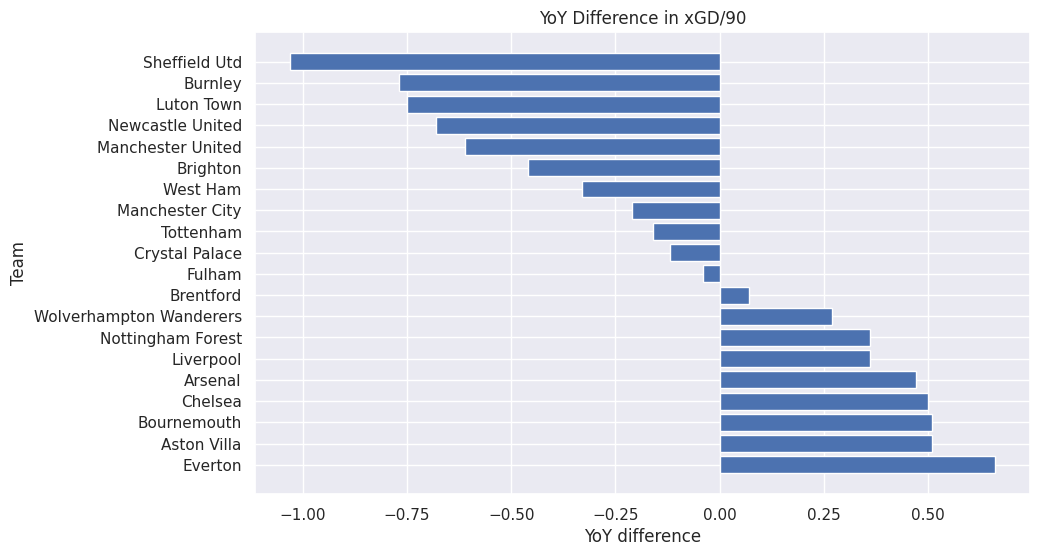

In [85]:
import matplotlib.pyplot as plt

# Create the YoY difference column
merged_df_filtered['YoY difference'] = merged_df_filtered['xGD/90_current'] - merged_df_filtered['xGD/90_last']

# Sort the DataFrame by YoY difference in descending order
merged_df_filtered_sorted = merged_df_filtered.sort_values('YoY difference', ascending=False)

# Generate the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(merged_df_filtered_sorted['Team'], merged_df_filtered_sorted['YoY difference'])
plt.xlabel('YoY difference')
plt.ylabel('Team')
plt.title('YoY Difference in xGD/90')
plt.show()

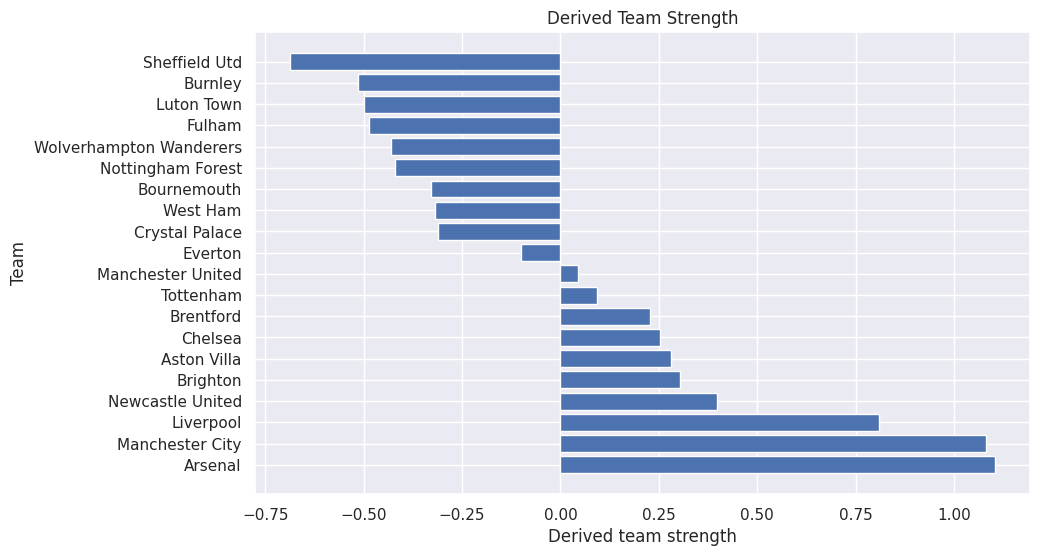

In [86]:
import matplotlib.pyplot as plt

# Create the Derived team strength column
merged_df_filtered['Derived team strength'] = (2/3) * merged_df_filtered['xGD/90_current'] + (1/3) * merged_df_filtered['xGD/90_last']

# Sort the DataFrame by Derived team strength in descending order
merged_df_filtered_sorted = merged_df_filtered.sort_values('Derived team strength', ascending=False)

# Generate the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(merged_df_filtered_sorted['Team'], merged_df_filtered_sorted['Derived team strength'])
plt.xlabel('Derived team strength')
plt.ylabel('Team')
plt.title('Derived Team Strength')
plt.show()

In [87]:
merged_df_filtered

,Team,xGD/90_current,xGD/90_last,YoY difference,Derived team strength
0,Liverpool,0.93,0.57,0.36,0.810000
1,Manchester City,1.01,1.22,-0.21,1.080000
2,Arsenal,1.26,0.79,0.47,1.103333
3,Tottenham,0.04,0.20,-0.16,0.093333
4,Aston Villa,0.45,-0.06,0.51,0.280000
5,Manchester United,-0.16,0.45,-0.61,0.043333
6,Newcastle United,0.17,0.85,-0.68,0.396667
7,West Ham,-0.43,-0.10,-0.33,-0.320000
8,Brighton,0.15,0.61,-0.46,0.303333
9,Chelsea,0.42,-0.08,0.50,0.253333


In [88]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mar 1 17:50:36 2020
@author: doug hagey
"""

import pandas as pd
import requests

def scrape_understat(payload):
    #Build request using url, headers (mimicking what Firefox does normally)
    #Works best with verify=True as you won't get the ssl errors. Payload is
    #taylored for each request
    url = 'https://understat.com/main/getPlayersStats/'
    headers = {'content-type':'application/json; charset=utf-8',
    'Host': 'understat.com',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73.0) Gecko/20100101 Firefox/73.0',
    'Accept': 'application/json, text/javascript, */*; q=0.01',
    'Accept-Encoding': 'gzip, deflate, br',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'X-Requested-With': 'XMLHttpRequest',
    'Content-Length': '310',
    'Origin': 'https: // understat.com',
    'Connection': 'keep - alive',
    'Referer': 'https: // understat.com / league / EPL'
    }
    response = requests.post(url, data=payload, headers = headers, verify=True)
    response_json = response.json()
    inner_wrapper = response_json['response']
    json_player_data = inner_wrapper['players']
    return json_player_data

def clean_df(player_df, weeks):
    # Get rid of the columns that we don't care about
    player_df.drop(['yellow_cards','red_cards', 'xGChain','xGBuildup','games','time'], axis=1, inplace=True)
    player_df  = player_df.rename(columns={'goals':'goals_'+weeks,'xG':'xG_'+weeks,'assists':'assists_'+weeks, 'xA':'xA_'+weeks, 'shots':'shots_'+weeks, 'key_passes':
        'key_passes_'+weeks,'npg':'npg_'+weeks,'npxG':'npxG_'+weeks})
    return(player_df)

#Creprint('Getting data for last 5 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '5'})
five_game_table = pd.DataFrame(json_player_data)
five_game_df = clean_df(five_game_table,'5wks')


print('Getting data for the whole season')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023'})
season_table = pd.DataFrame(json_player_data)
season_df = clean_df(season_table, 'season')

print('Getting data for last 5 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '5'})
five_game_table = pd.DataFrame(json_player_data)
five_game_df = clean_df(five_game_table,'5wks')

print('Getting data for the whole season')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023'})
season_table = pd.DataFrame(json_player_data)
season_df = clean_df(season_table, 'season')

print('Getting data for last 5 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '5'})
five_game_table = pd.DataFrame(json_player_data)
five_game_df = clean_df(five_game_table,'5wks')

print('Merging Tables')
EPL_player_df = pd.merge(five_game_df, season_df, on=['id','player_name'])
EPL_player_df = pd.merge(EPL_player_df, five_game_df, on=['id','player_name'])


print('Writing CSV File')
EPL_player_df.to_csv('Understat_EPL_Player_Data_Combined 2021.csv', encoding='utf-8', index=False)


# Assuming you have a DataFrame named EPL_player_df

# Extract relevant columns
selected_columns = ['player_name', 'xG_5wks_x', 'xA_5wks_x']
subset_df = EPL_player_df[selected_columns]

# Rename columns
subset_df.rename(columns={'xG_5wks_x': 'xG 5 Weeks', 'xA_5wks_x': 'xA 5 Weeks'}, inplace=True)

# Round the numbers to 2 decimal places
subset_df = subset_df.round(2)

# Sort by xG 5 Weeks in descending order
top_10_xG = subset_df.sort_values(by='xG 5 Weeks', ascending=False).head(10)

# Sort by xA 5 Weeks in descending order
top_10_xA = subset_df.sort_values(by='xA 5 Weeks', ascending=False).head(10)

# Display the top 10 for xG 5 Weeks
print("Top 10 for xG 5 Weeks:")
print(top_10_xG)

# Display the top 10 for xA 5 Weeks
print("\nTop 10 for xA 5 Weeks:")
print(top_10_xA)



Getting data for the whole season
Getting data for last 5 matches
Getting data for the whole season
Getting data for last 5 matches
Merging Tables
Writing CSV File
Top 10 for xG 5 Weeks:
       player_name          xG 5 Weeks           xA 5 Weeks
21    Darwin Núñez   5.045277703553438   1.5492770969867706
2      Bukayo Saka   4.237679298967123   1.4288920760154724
4   Elijah Adebayo   3.737639993429184  0.15402574092149734
7    Matheus Cunha  3.6102453991770744    1.024787351489067
5    Mohamed Salah   3.444396495819092    2.419852130115032
1      Richarlison   3.293329194188118    0.641944844275713
23  Carlton Morris  3.2740579545497894   1.1975008845329285
18      João Pedro  3.2716708071529865   0.7514005489647388
42  Erling Haaland  3.1414045691490173   1.0800882130861282
22  Julián Álvarez  2.9469934478402138   0.3866907972842455

Top 10 for xA 5 Weeks:
         player_name           xG 5 Weeks          xA 5 Weeks
59   Kevin De Bruyne   0.7108262702822685  2.5967108458280563
231  

In [89]:
# Extract relevant columns
selected_columns_xG = ['team_name', 'xG_5wks']
selected_columns_xGA = ['team_name', 'xGA_5wks']

# Rename columns
subset_xG = season_df[selected_columns_xG].rename(columns={'xG_5wks': 'xG 5 Weeks'})
subset_xGA = season_df[selected_columns_xGA].rename(columns={'xGA_5wks': 'xGA 5 Weeks'})

# Sort by xG 5 Weeks and xGA 5 Weeks respectively
top_xG = subset_xG.sort_values(by='xG 5 Weeks', ascending=False).head(10)
top_xGA = subset_xGA.sort_values(by='xGA 5 Weeks', ascending=False).head(10)

# Display the top 10 for xG 5 Weeks
print("Top 10 teams with the highest xG over the last 5 games:")
print(top_xG)

# Display the top 10 for xGA 5 Weeks
print("\nTop 10 teams with the highest xGA over the last 5 games:")
print(top_xGA)


KeyError: "None of [Index(['team_name', 'xG_5wks'], dtype='object')] are in the [columns]"

In [90]:
import pandas as pd

# Your list of values
values = [0.91, 0.326666667, 1.073333333, 0.93, 0.08, -0.286666667, 0.383333333, 0.036666667, 0.476666667, 0.326666667, -0.416666667, -0.376666667, -0.486666667, -0.21, -0.453333333, 0.32, -0.1, -0.68, -0.566666667, -0.786666667]

# Update the existing dataframe
merged_df_filtered['Derived team strength'] = values

# Set the desired range
new_min = 0.5
new_max = 1.5

# Scale the values
min_value = merged_df_filtered['Derived team strength'].min()
max_value = merged_df_filtered['Derived team strength'].max()

merged_df_filtered['Derived team strength'] = ((merged_df_filtered['Derived team strength'] - min_value) * (new_max - new_min) / (max_value - min_value)) + new_min

# Display the updated dataframe
merged_df_filtered


,Team,xGD/90_current,xGD/90_last,YoY difference,Derived team strength
0,Liverpool,0.93,0.57,0.36,1.412186
1,Manchester City,1.01,1.22,-0.21,1.098566
2,Arsenal,1.26,0.79,0.47,1.500000
3,Tottenham,0.04,0.20,-0.16,1.422939
4,Aston Villa,0.45,-0.06,0.51,0.965950
5,Manchester United,-0.16,0.45,-0.61,0.768817
6,Newcastle United,0.17,0.85,-0.68,1.129032
7,West Ham,-0.43,-0.10,-0.33,0.942652
8,Brighton,0.15,0.61,-0.46,1.179211
9,Chelsea,0.42,-0.08,0.50,1.098566
